In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller, acf, pacf, kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.arima.model import ARIMA

In [2]:
def check_stationarity(series):
    adf_result = adfuller(series.dropna())
    kpss_result = kpss(series.dropna(), regression="c", nlags="auto")

    print(f"ADF p-value: {adf_result[1]}")  # < 0.05 → stationary
    print(f"KPSS p-value: {kpss_result[1]}")  # > 0.05 → stationary

In [3]:
df = pd.read_csv('D:/Documents/Bicocca/2Year/TimeSeries/project/data/ts2024.csv')

In [4]:
df['DateTime'] = pd.to_datetime(df['DateTime'], format='ISO8601')


In [5]:
hourly_index = pd.date_range(start=df['DateTime'].min(), end=df['DateTime'].max(), freq='H')


In [6]:
hourly_index = pd.date_range(start=df['DateTime'].min(), end=df['DateTime'].max(), freq='H')
df = df.set_index(hourly_index).rename_axis('date')

In [7]:

df['DayOfWeek'] = df.index.dayofweek



In [8]:
train = df[df['X'].notna()]  
test = df[df['X'].isna()]  

# Preliminary analysis

count    16800.000000
mean         0.046320
std          0.048945
min          0.000000
25%          0.018200
50%          0.036800
75%          0.053800
max          0.450000
Name: X, dtype: float64


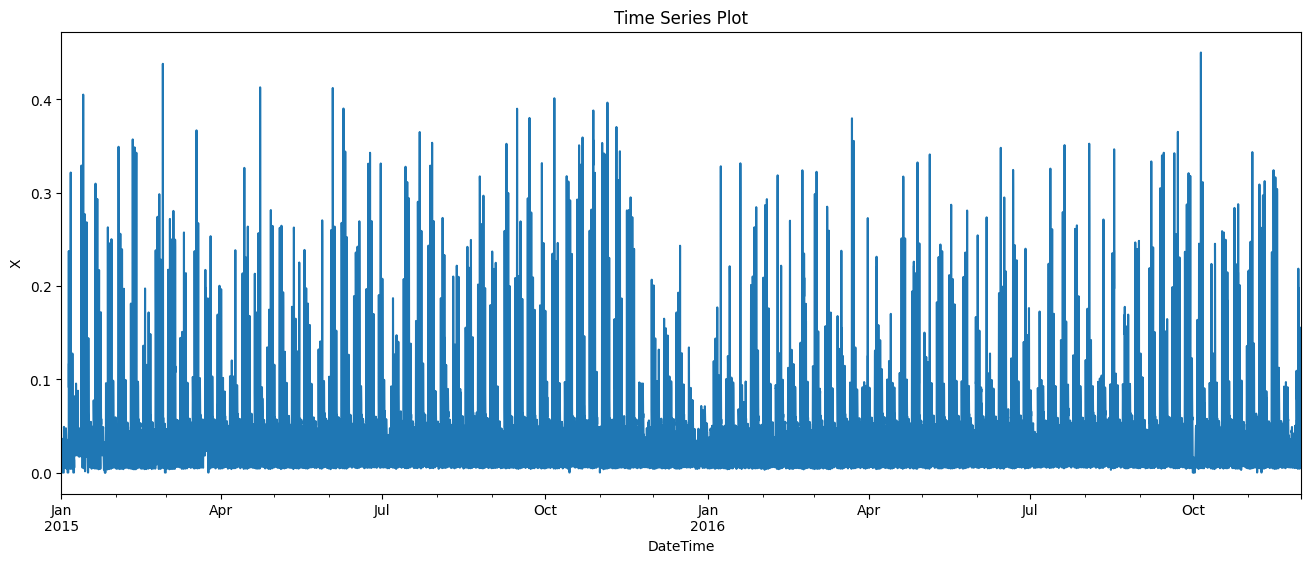

In [9]:
print(train['X'].describe())

# Plot the time series
train['X'].plot(figsize=(16, 6))
plt.title('Time Series Plot')
plt.xlabel('DateTime')
plt.ylabel('X')
plt.show()

# Stationarity of initial data

In [10]:
check_stationarity(train['X'])

ADF p-value: 1.3593708662228269e-28
KPSS p-value: 0.1


C:\Users\pavel\AppData\Local\Temp\ipykernel_9112\3599269303.py:3: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_result = kpss(series.dropna(), regression="c", nlags="auto")


# Seasonal patterns investigation

In [11]:
train_jan_2015 = train[train.index < '2015-02']

train_3days = train[(train.index >= '2015-02-02') & (train.index <= '2015-02-04')]
train_week = train[(train.index >= '2015-02-02') & (train.index <= '2015-02-08')]
train_2weeks = train[(train.index >= '2015-02-02') & (train.index <= '2015-02-15')]
train_month = train[(train.index >= '2015-02-01') & (train.index < '2015-03-01')]



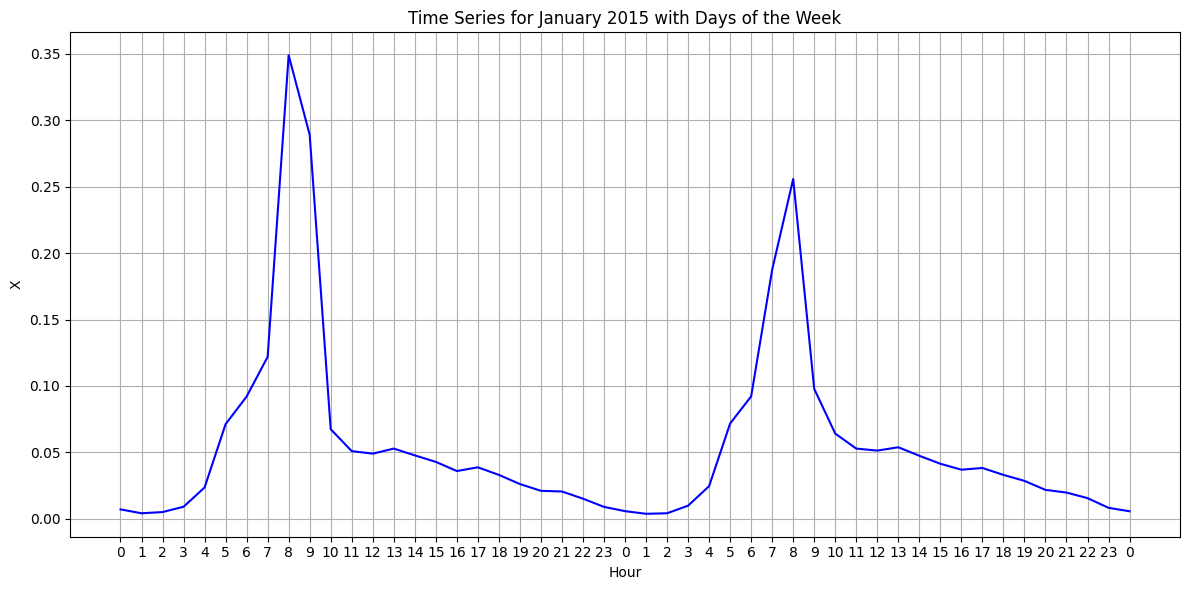

In [12]:
plt.figure(figsize=(12, 6))

# Plot the 'X' values, showing the days of the week for each date
plt.plot(train_3days.index, train_3days['X'], label='X values', color='blue')

# Formatting the x-axis to display days of the week
plt.xticks(
    ticks=train_3days.index, 
    labels=train_3days['Hour']
)

plt.title('Time Series for January 2015 with Days of the Week')
plt.xlabel('Hour')
plt.ylabel('X')
plt.grid(True)
plt.tight_layout()

plt.show()

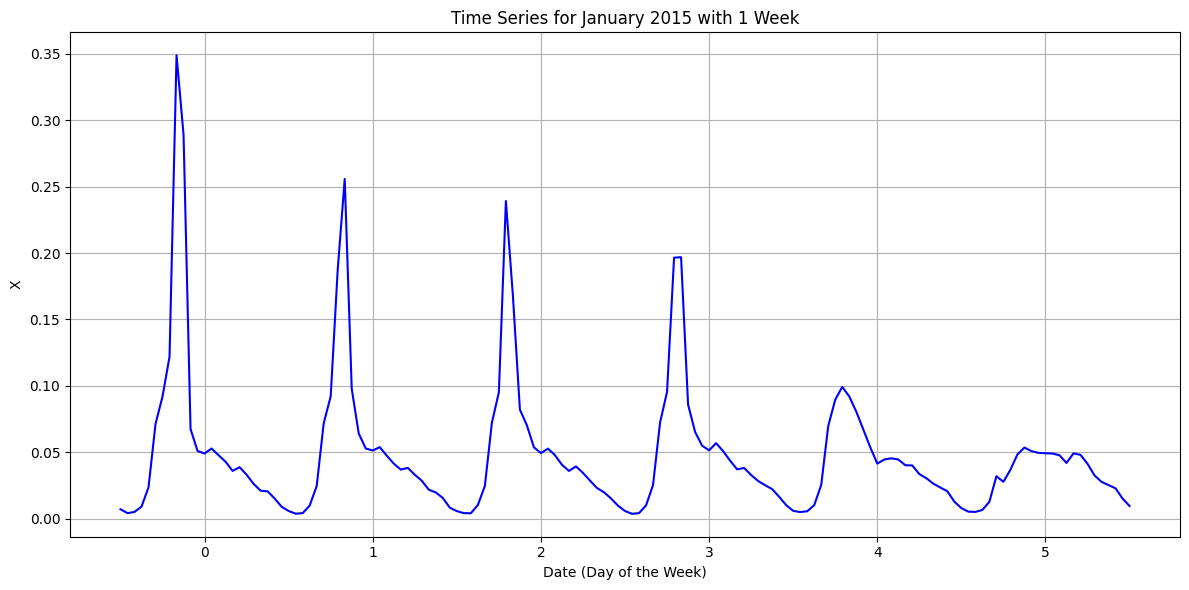

In [13]:
plt.figure(figsize=(12, 6))

# Plot the 'X' values, showing the days of the week for each date
plt.plot(train_week.index, train_week['X'], label='X values', color='blue')


# Formatting the x-axis to display only the beginning of the day
plt.xticks(
    ticks=[date for date in train_week.index if date.hour == 12], 
    labels=[train_week.loc[date, 'DayOfWeek'] for date in train_week.index if date.hour == 12], 

)



plt.title('Time Series for January 2015 with 1 Week')
plt.xlabel('Date (Day of the Week)')
plt.ylabel('X')
plt.grid(True)
plt.tight_layout()

plt.show()

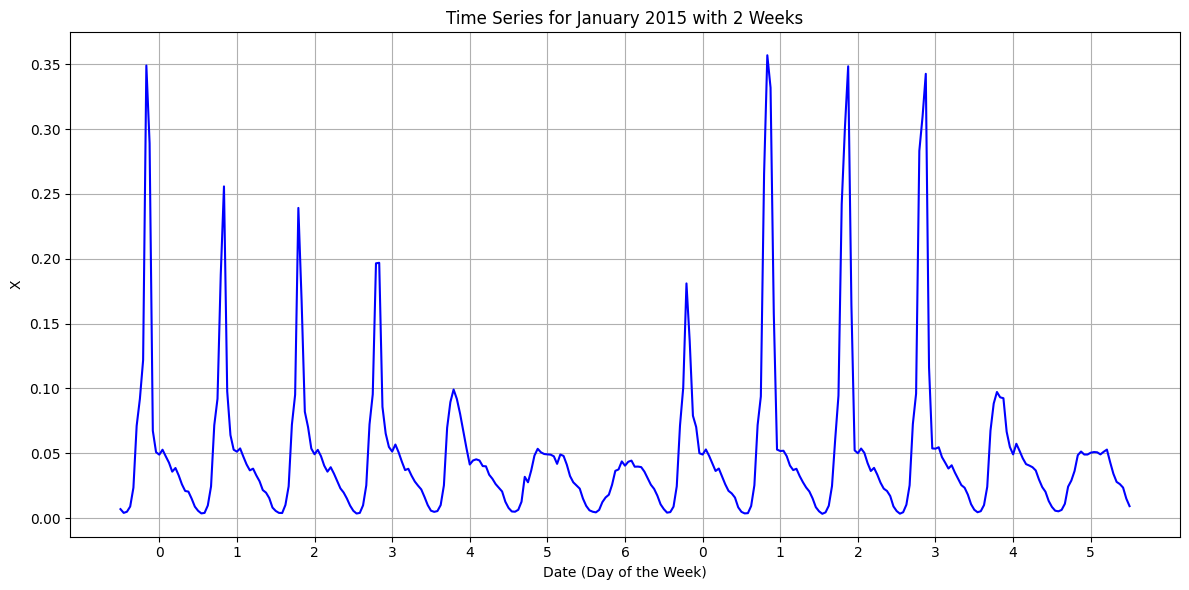

In [14]:
plt.figure(figsize=(12, 6))

# Plot the 'X' values, showing the days of the week for each date
plt.plot(train_2weeks.index, train_2weeks['X'], label='X values', color='blue')



plt.xticks(
    ticks=[date for date in train_2weeks.index if date.hour == 12], 
    labels=[train_2weeks.loc[date, 'DayOfWeek'] for date in train_2weeks.index if date.hour == 12]
)



plt.title('Time Series for January 2015 with 2 Weeks')
plt.xlabel('Date (Day of the Week)')
plt.ylabel('X')
plt.grid(True)
plt.tight_layout()


plt.show()

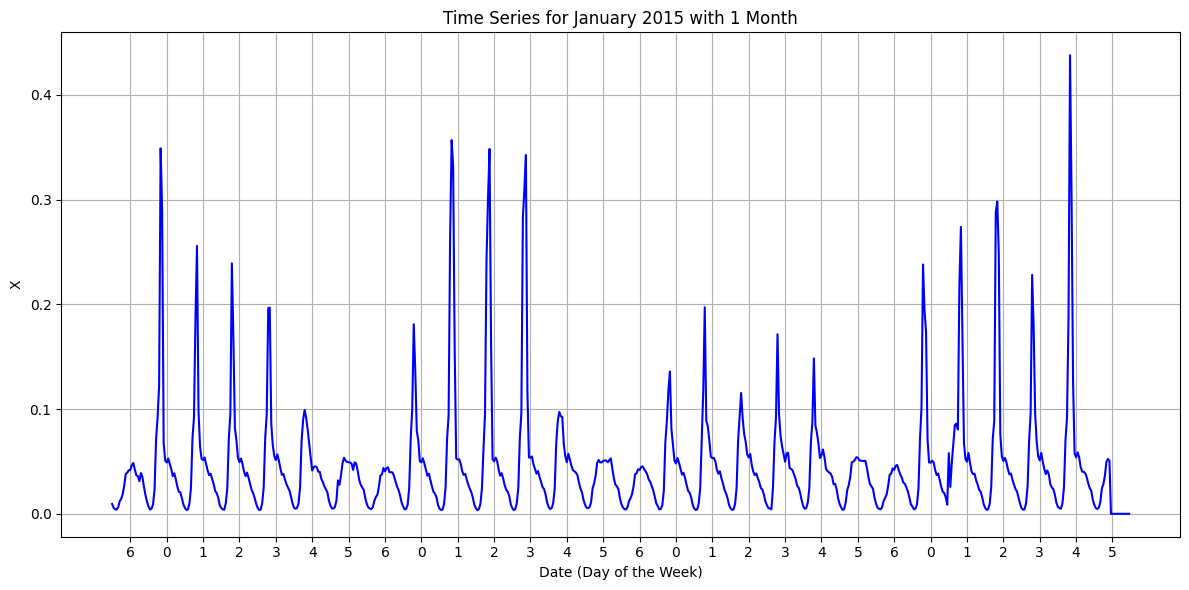

In [15]:
plt.figure(figsize=(12, 6))

# Plot the 'X' values, showing the days of the week for each date
plt.plot(train_month.index, train_month['X'], label='X values', color='blue')




plt.xticks(
    ticks=[date for date in train_month.index if date.hour == 12], 
    labels=[train_month.loc[date, 'DayOfWeek'] for date in train_month.index if date.hour == 12]
)




plt.title('Time Series for January 2015 with 1 Month')
plt.xlabel('Date (Day of the Week)')
plt.ylabel('X')
plt.grid(True)
plt.tight_layout()



plt.show()

In [16]:
import pandas as pd

# Resample the hourly data to monthly data by taking the mean
train_monthly = train['X'].resample('M').mean()

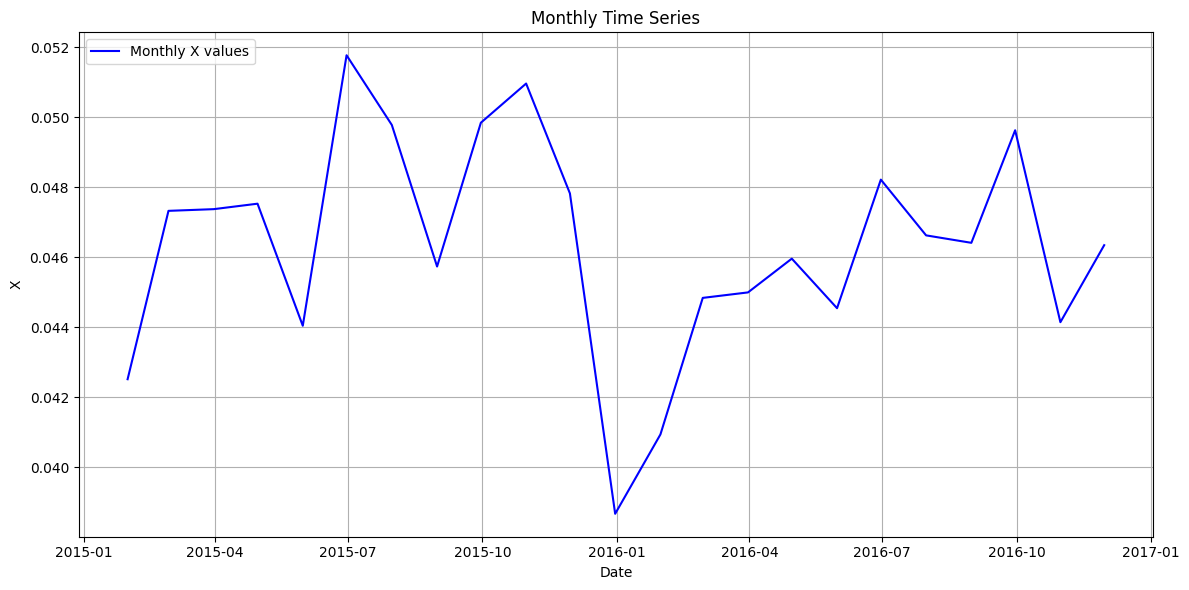

In [17]:
plt.figure(figsize=(12, 6))
plt.plot(train_monthly, label='Monthly X values', color='blue')
plt.title('Monthly Time Series')
plt.xlabel('Date')
plt.ylabel('X')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


# PACF and ACF analysis

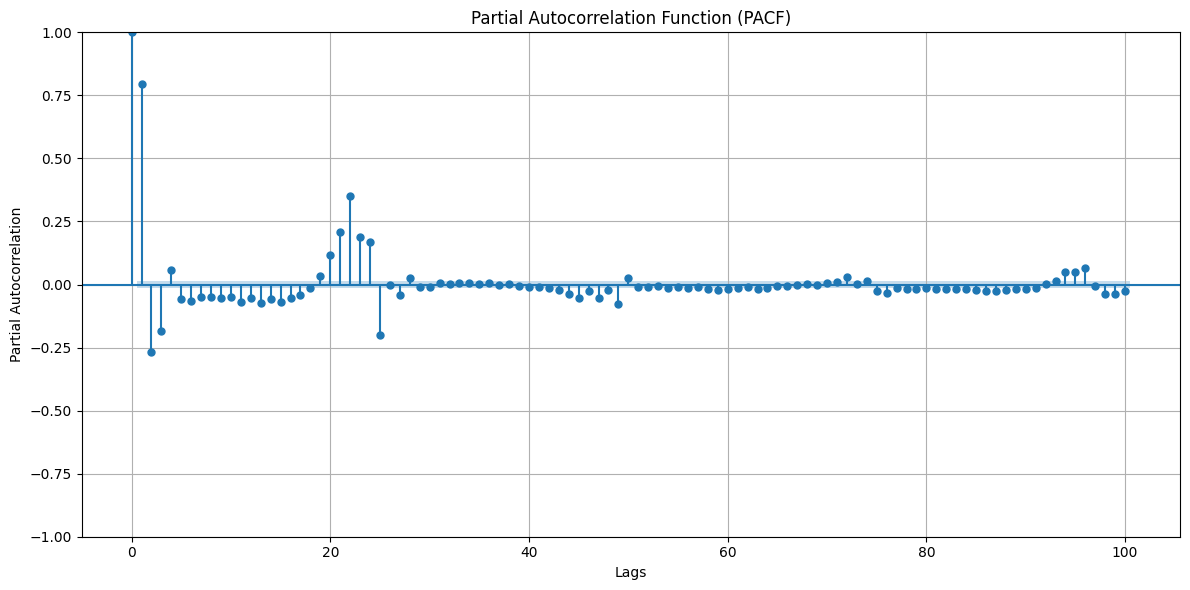

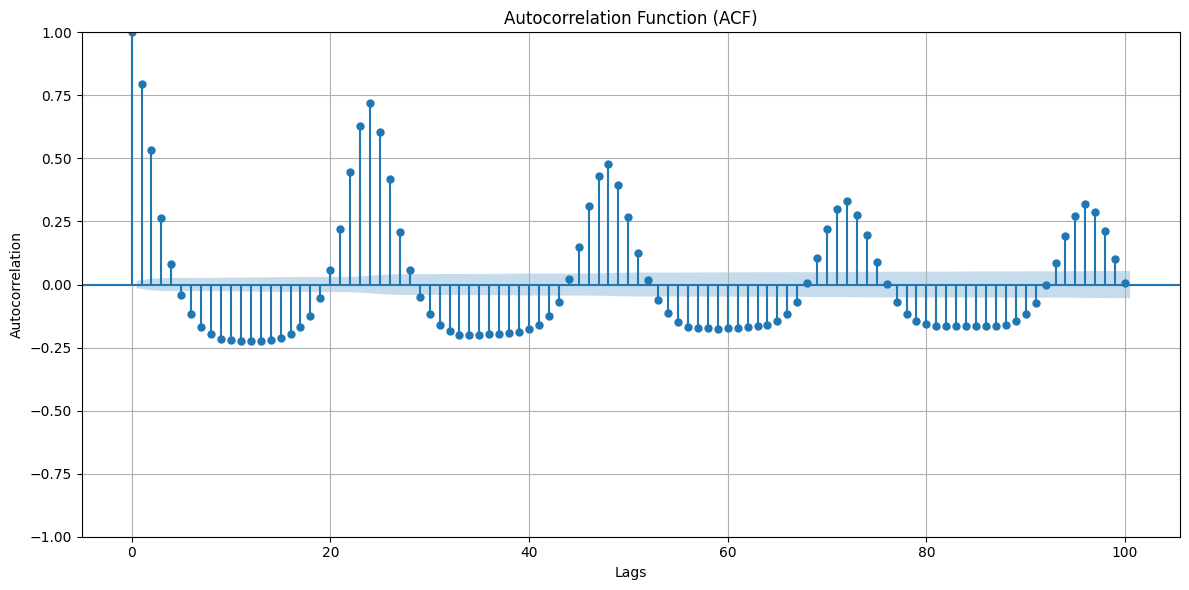

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot PACF
plt.figure(figsize=(12, 6))
plot_pacf(train['X'], lags=100, method='ywm', ax=plt.gca())
plt.title('Partial Autocorrelation Function (PACF)')
plt.xlabel('Lags')
plt.ylabel('Partial Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()


# Plot ACF
plt.figure(figsize=(12, 6))
plot_acf(train['X'], lags=100, ax=plt.gca())
plt.title('Autocorrelation Function (ACF)')
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.grid(True)
plt.tight_layout()
plt.show()



## Differencing


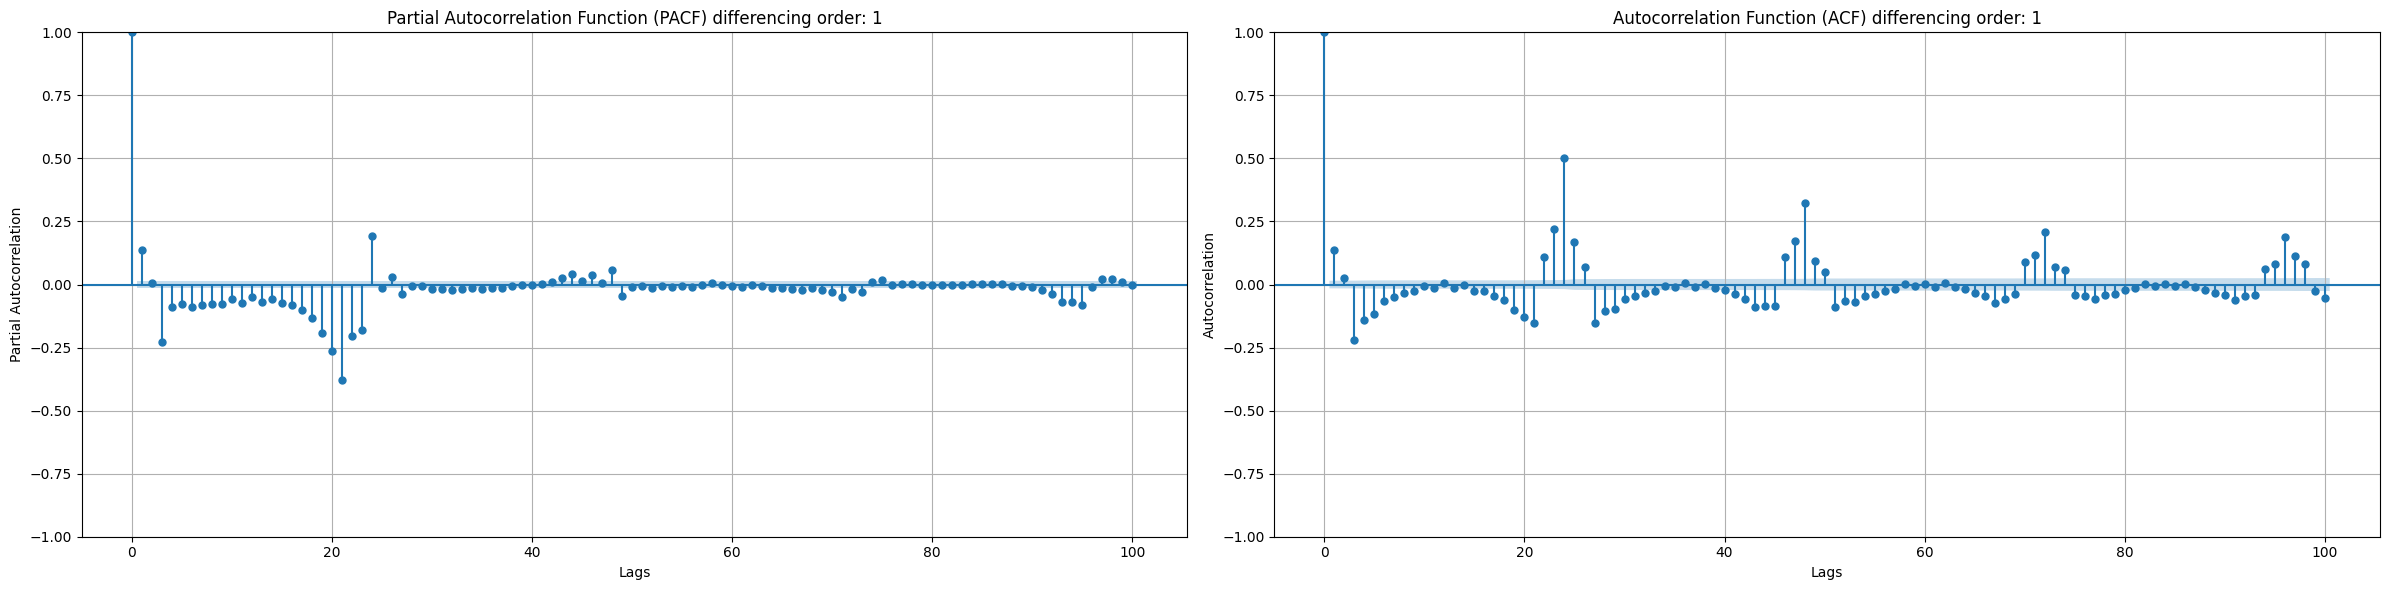

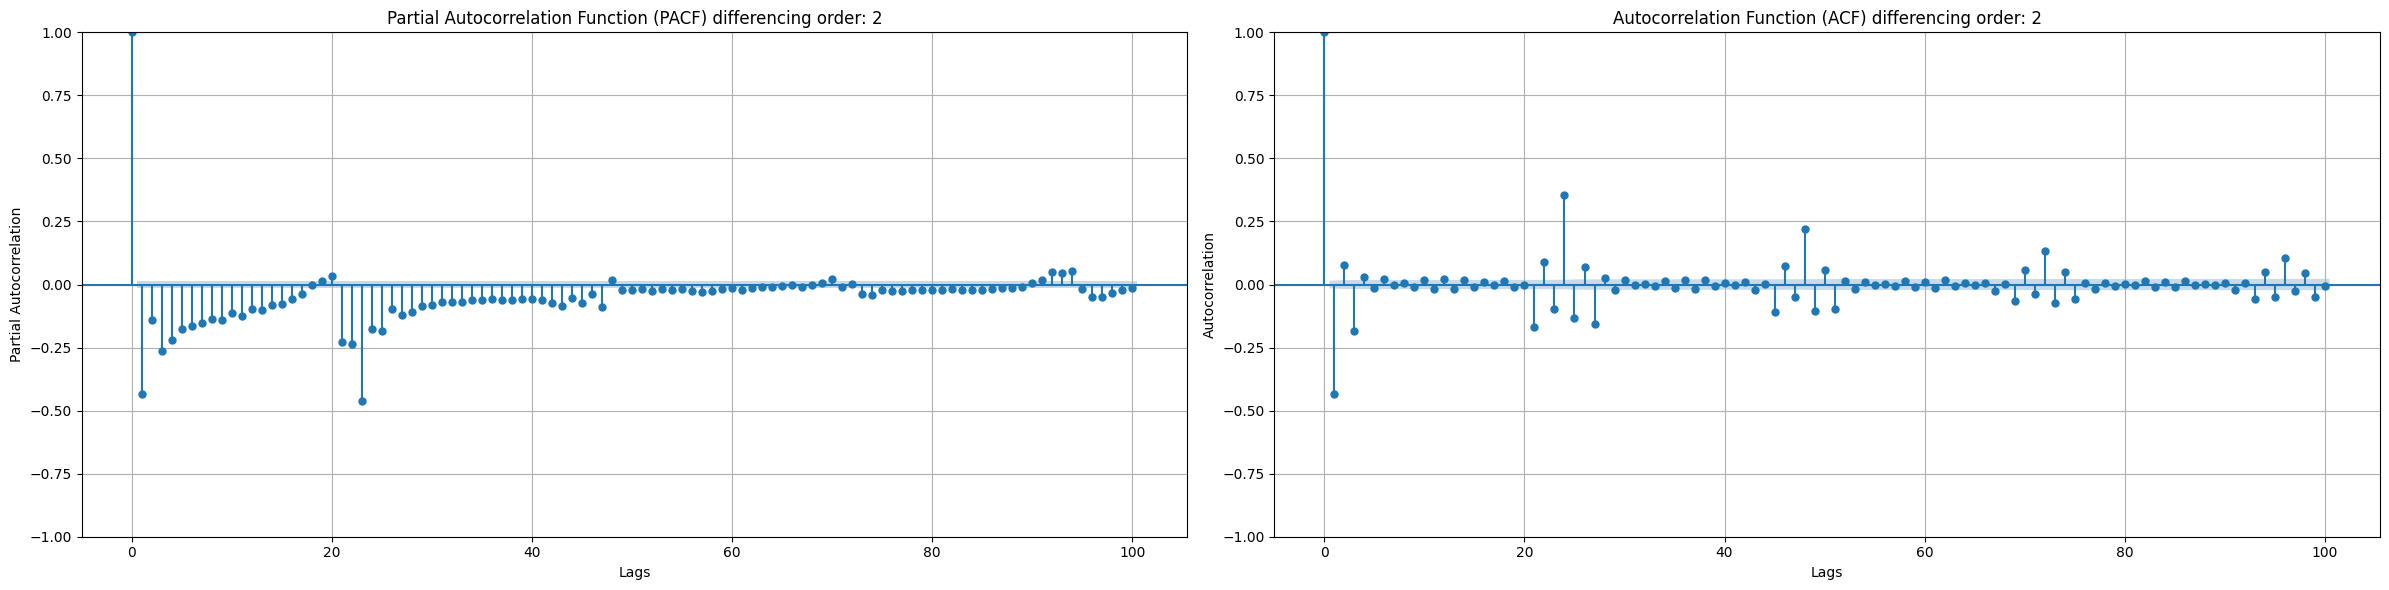

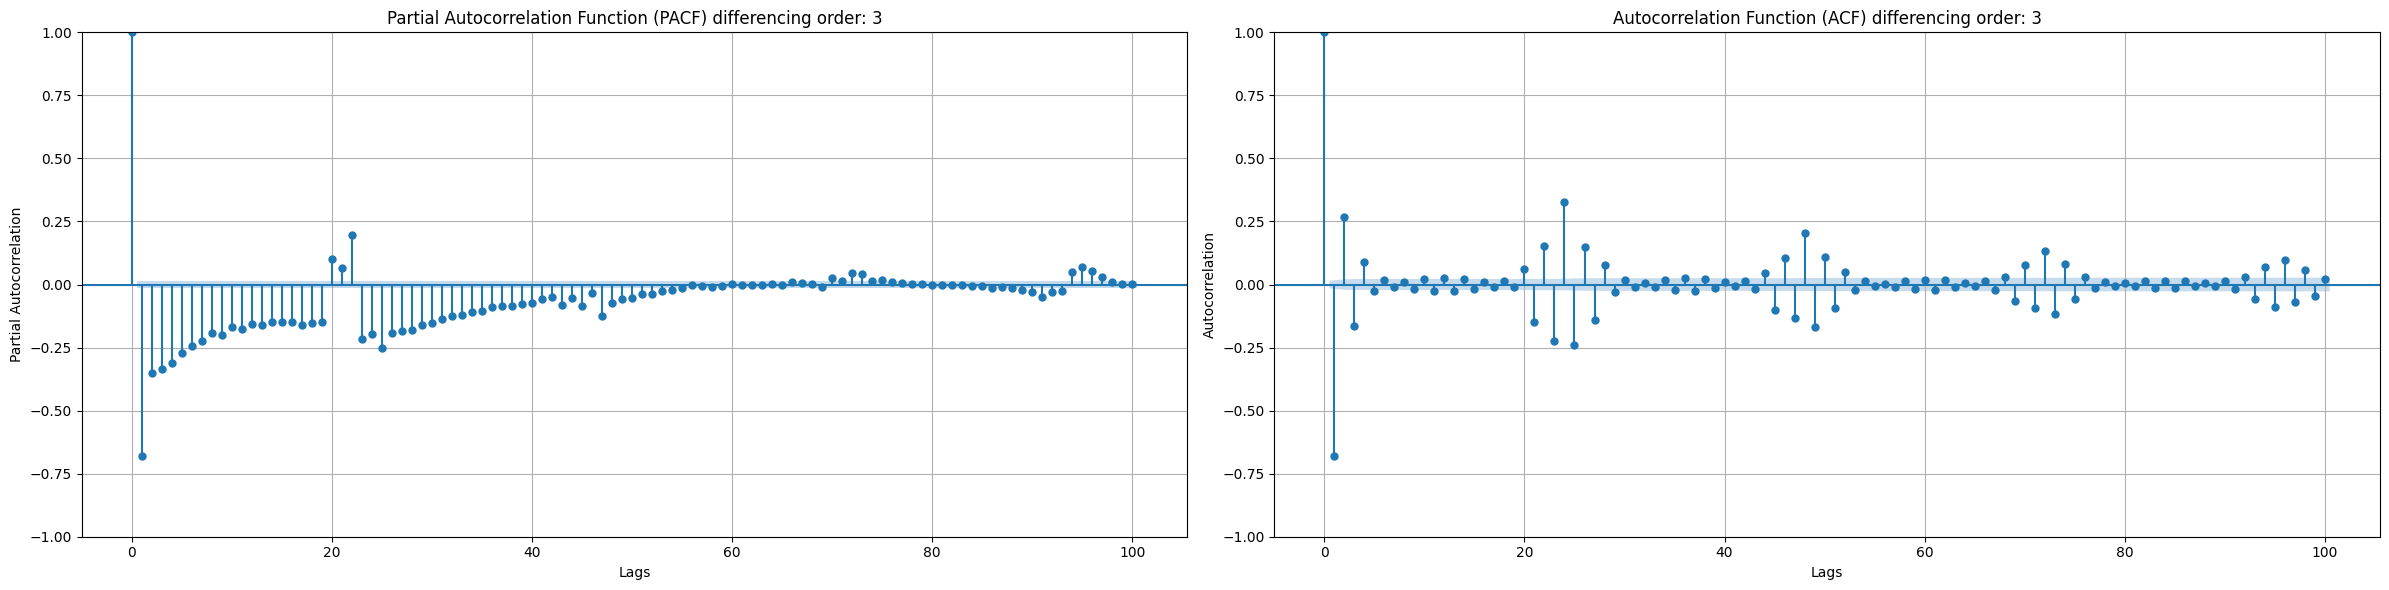

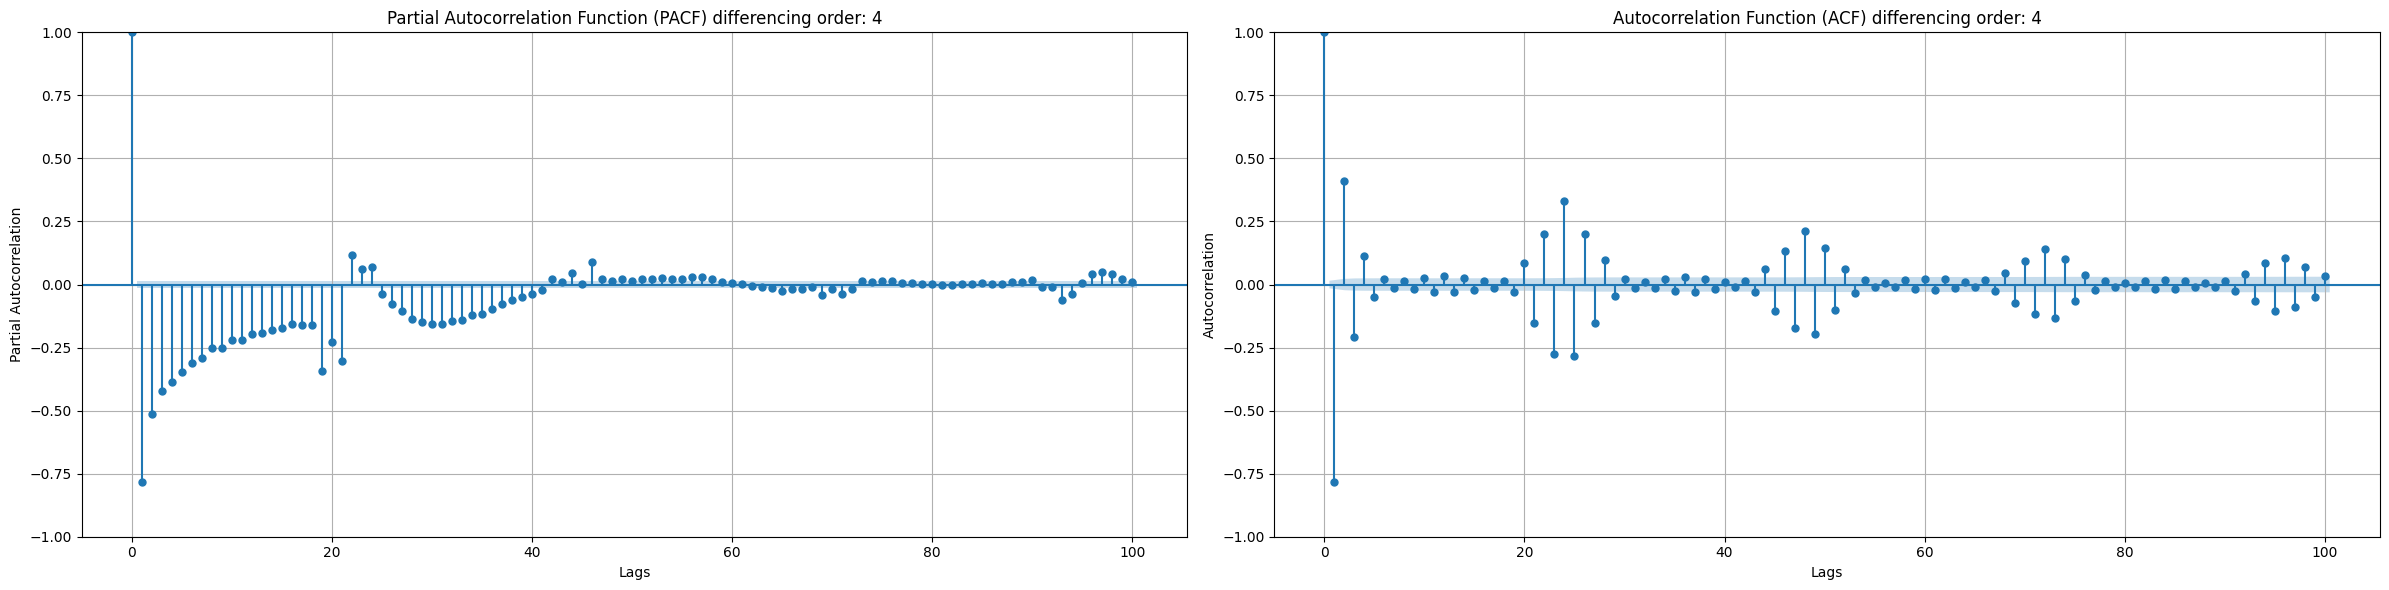

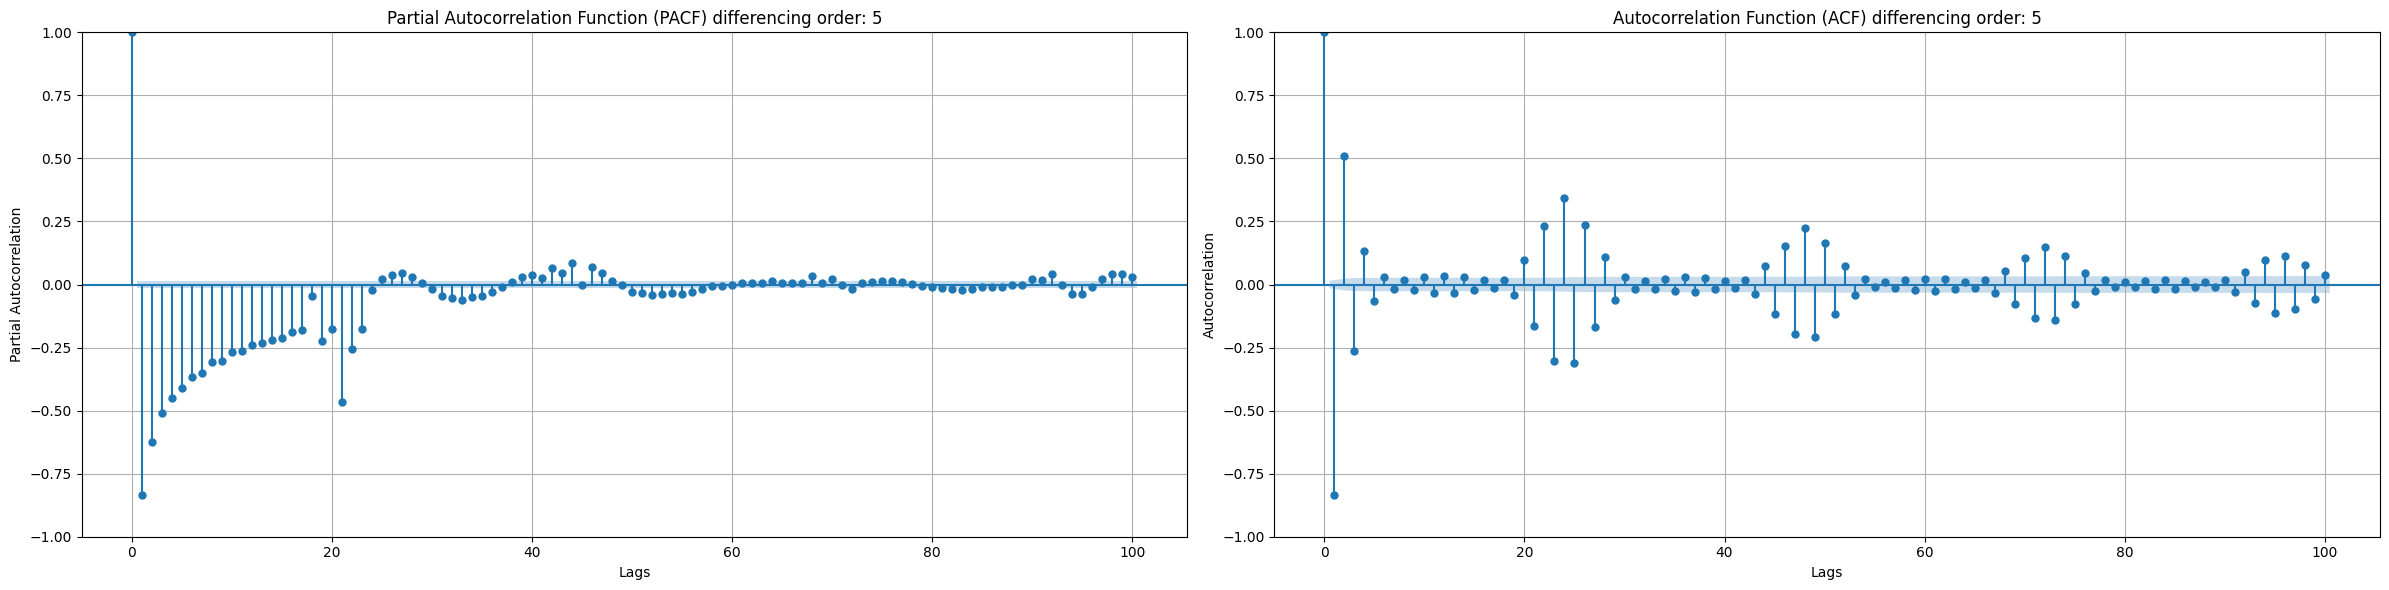

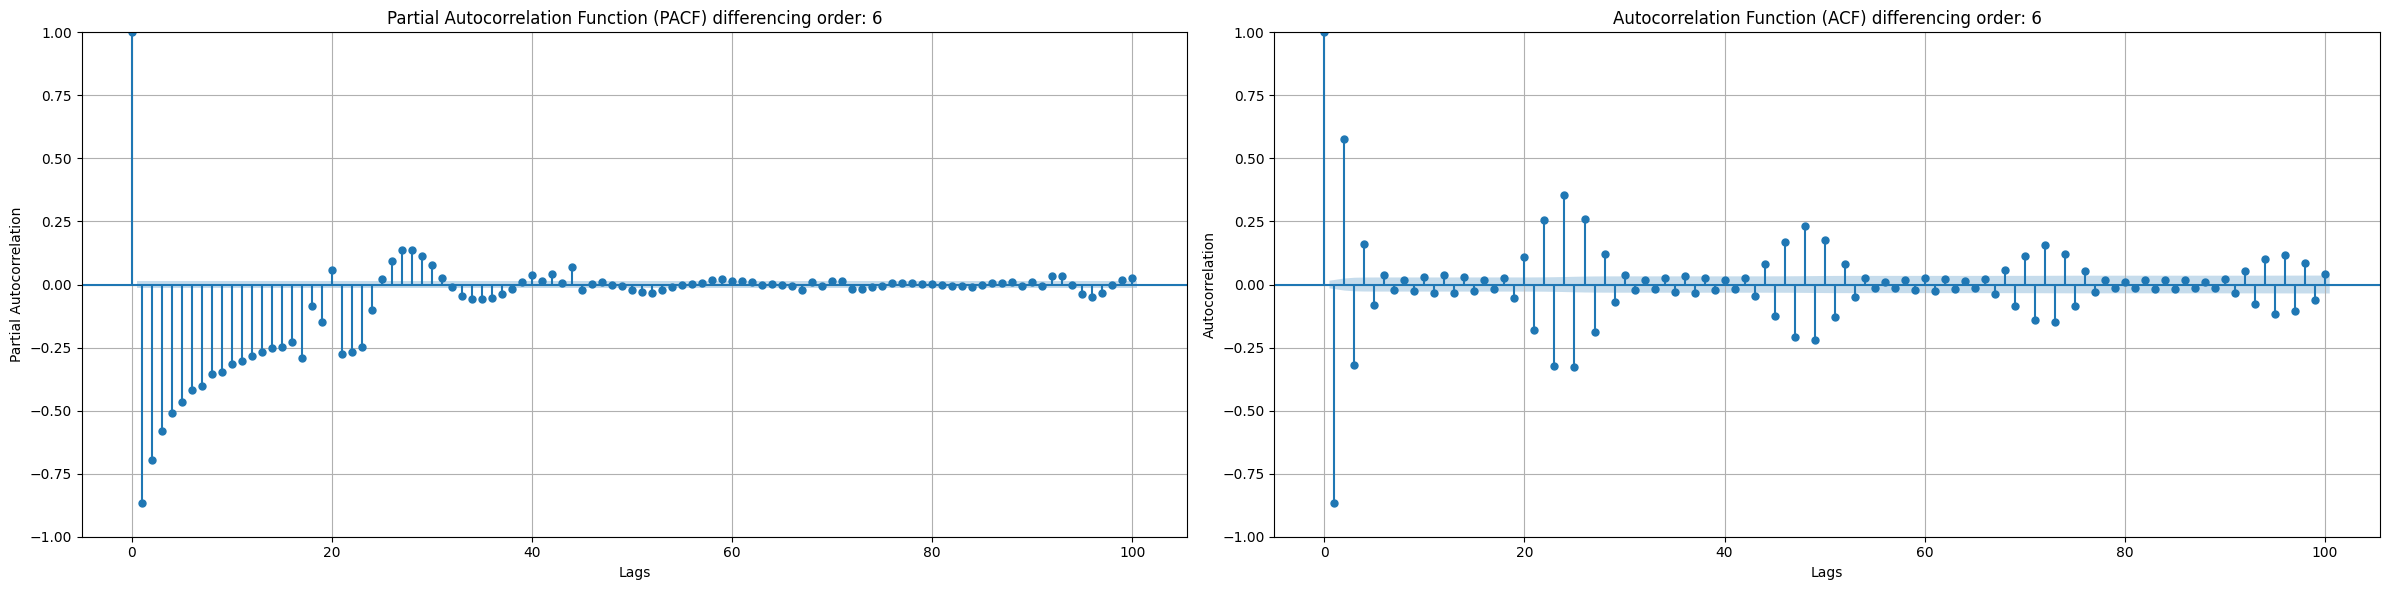

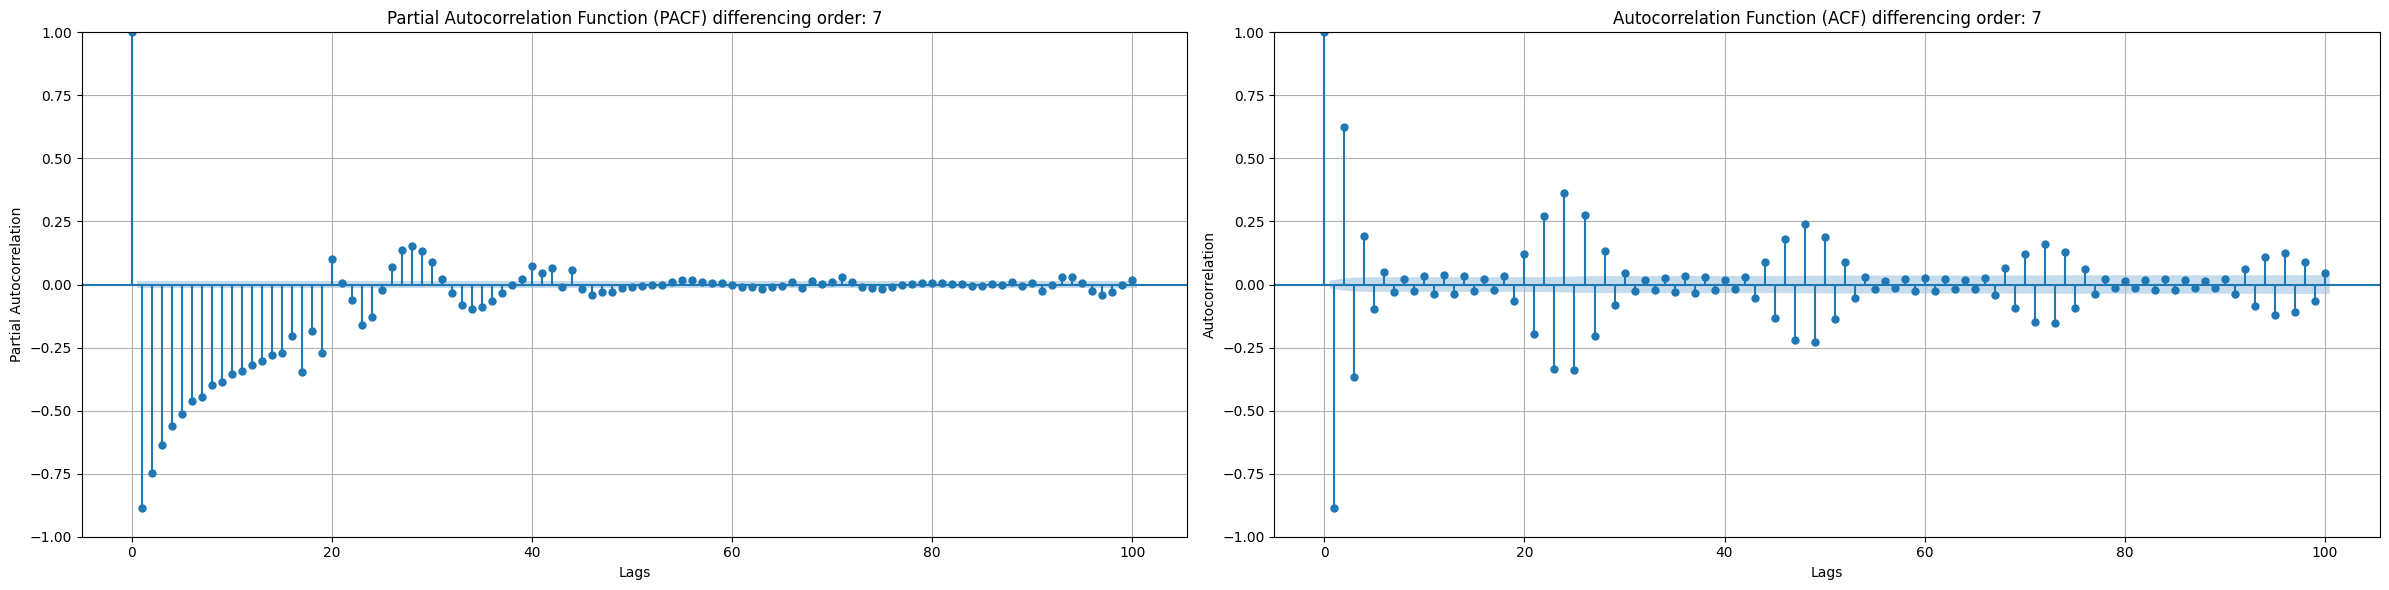

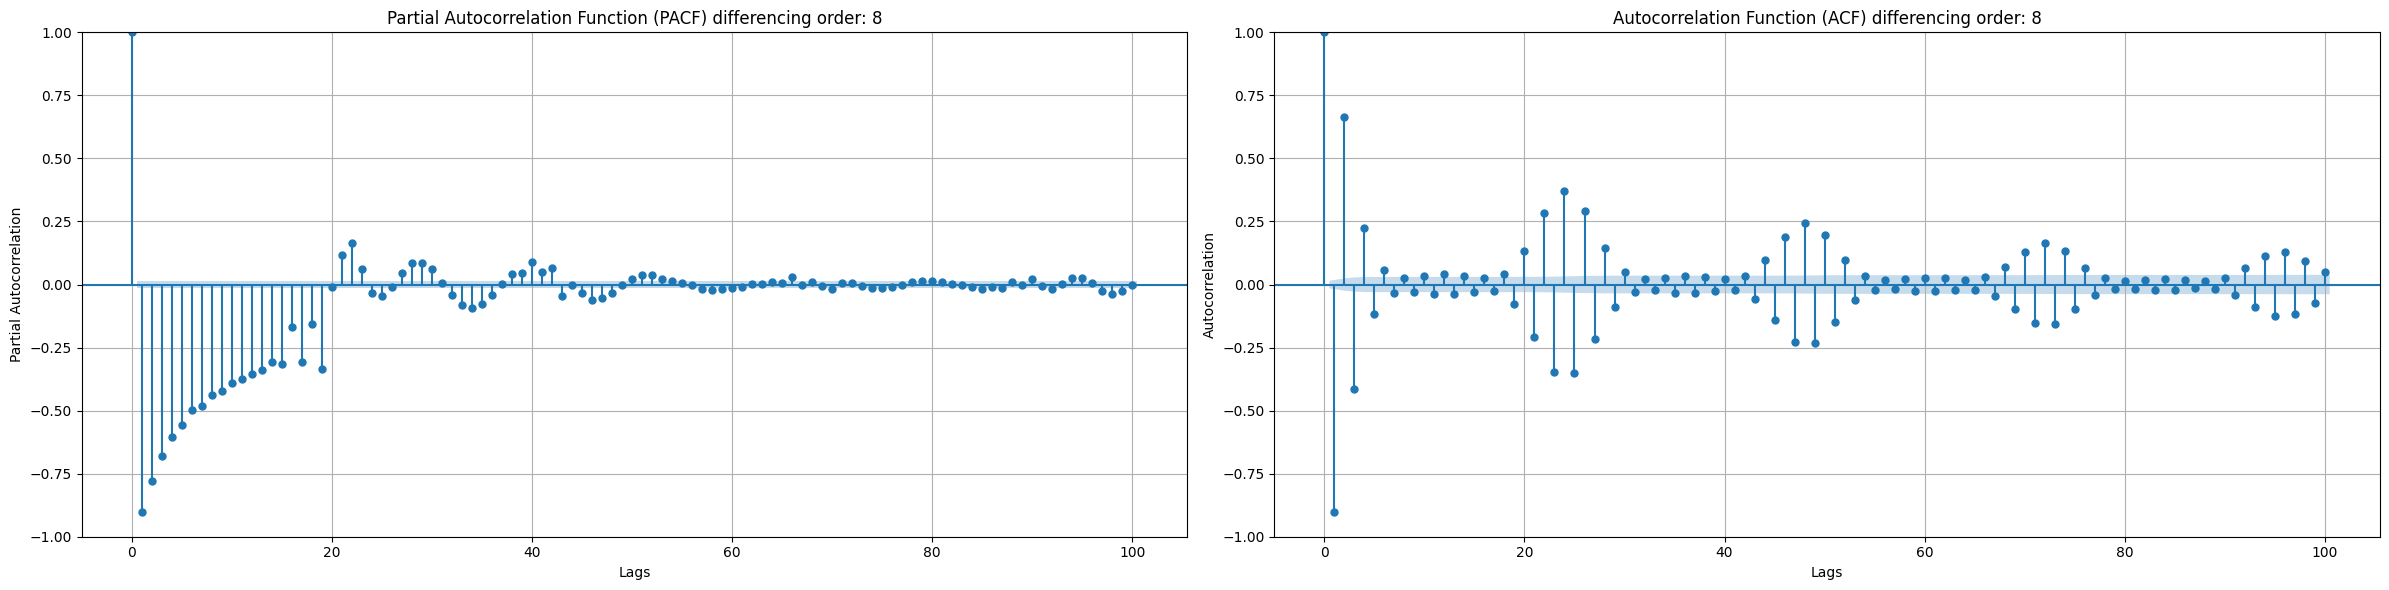

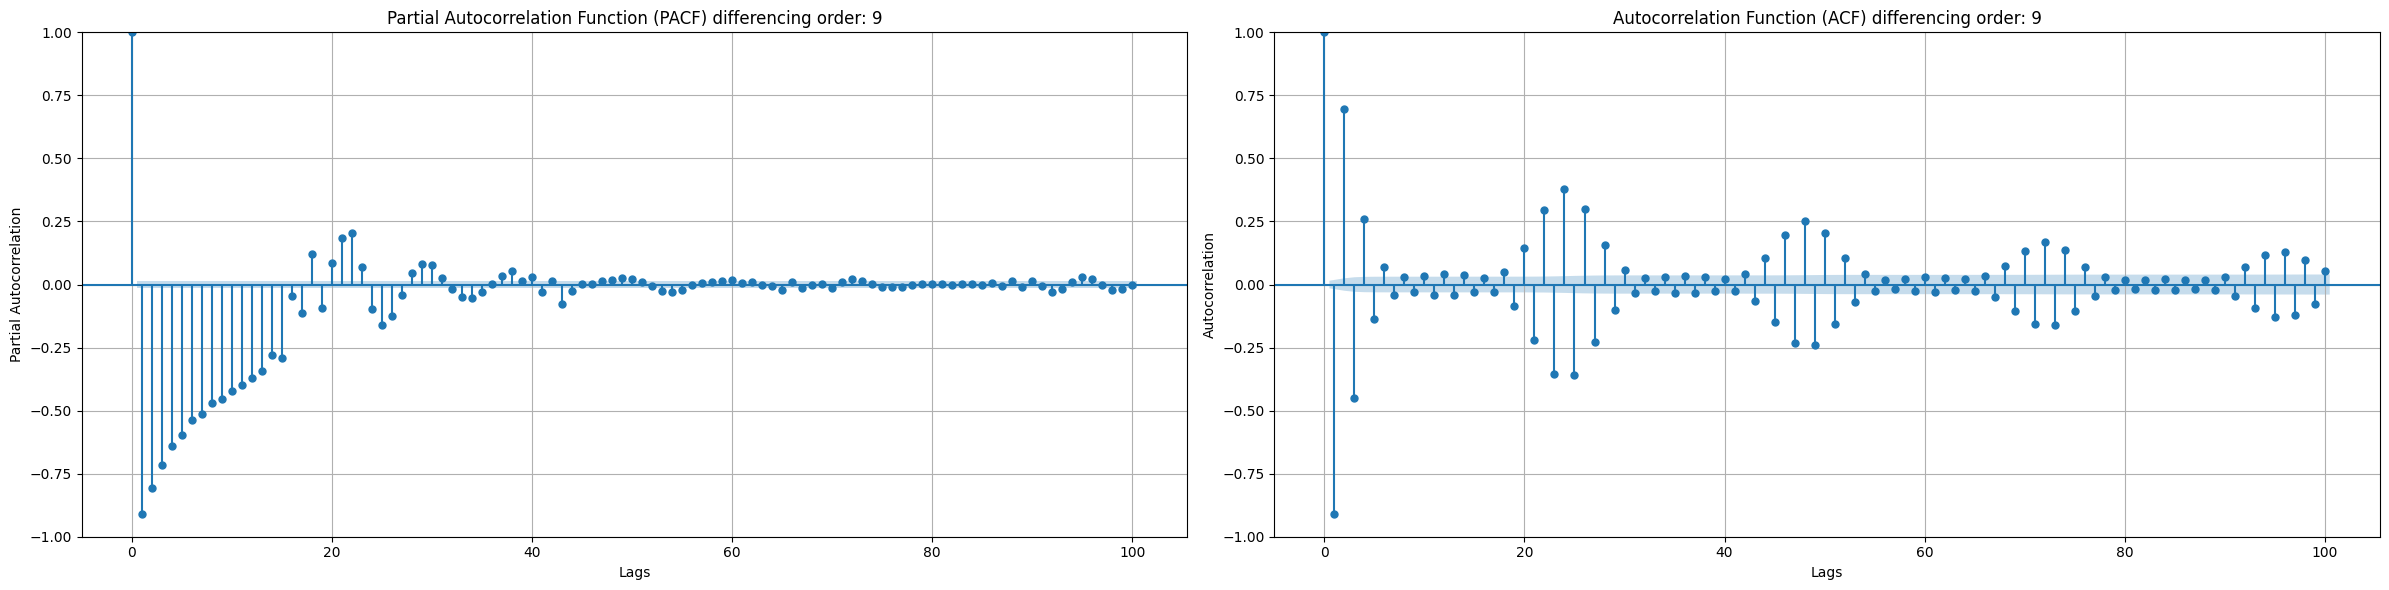

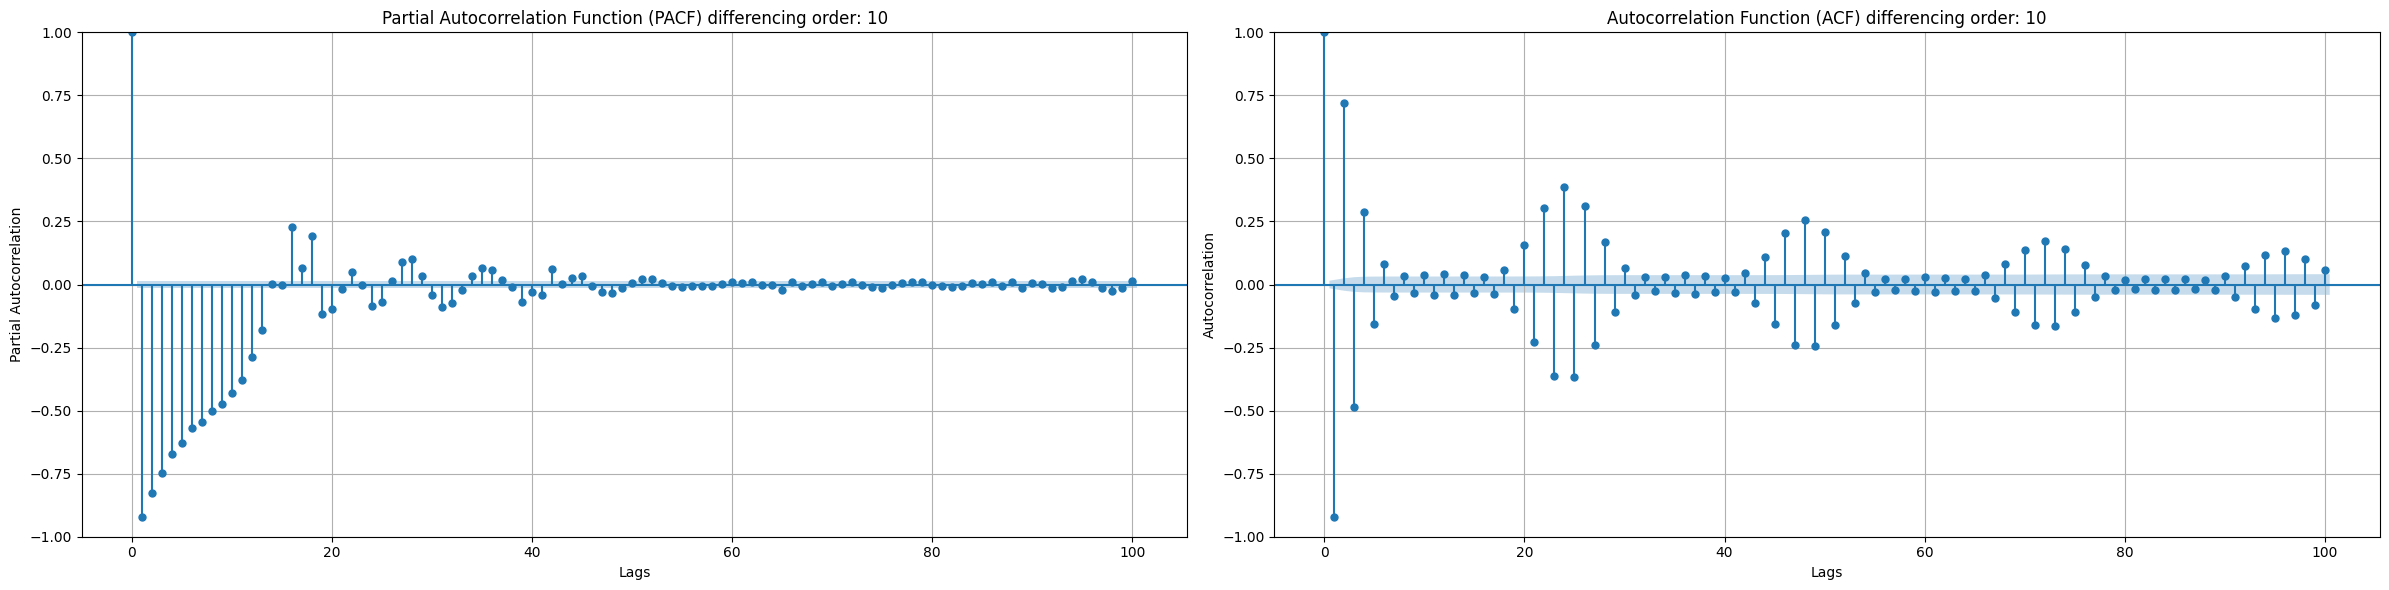

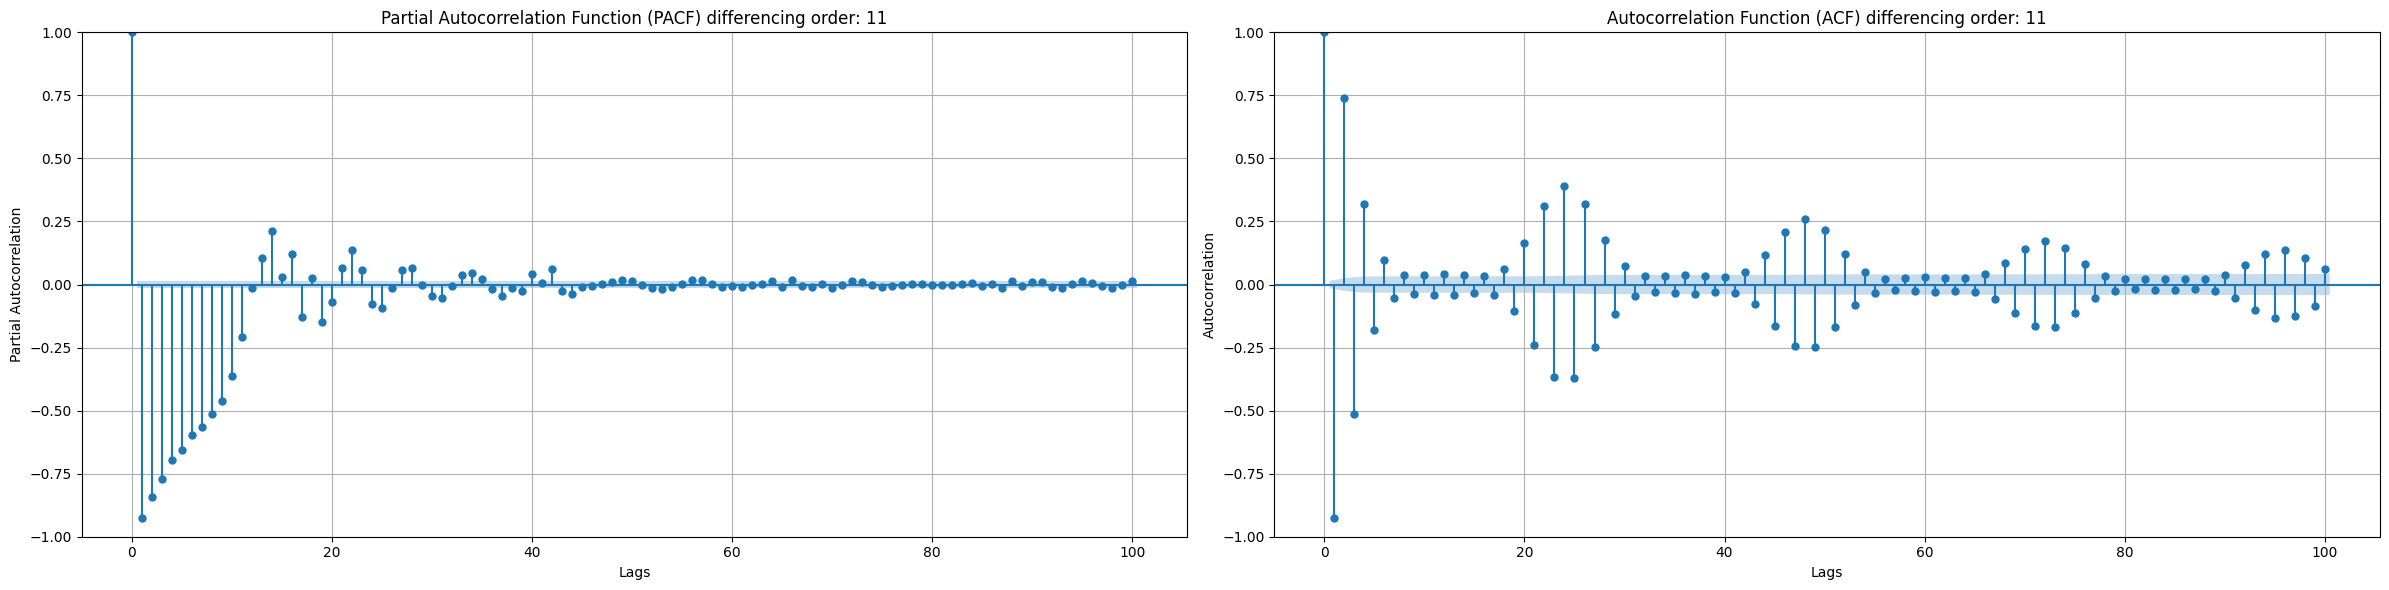

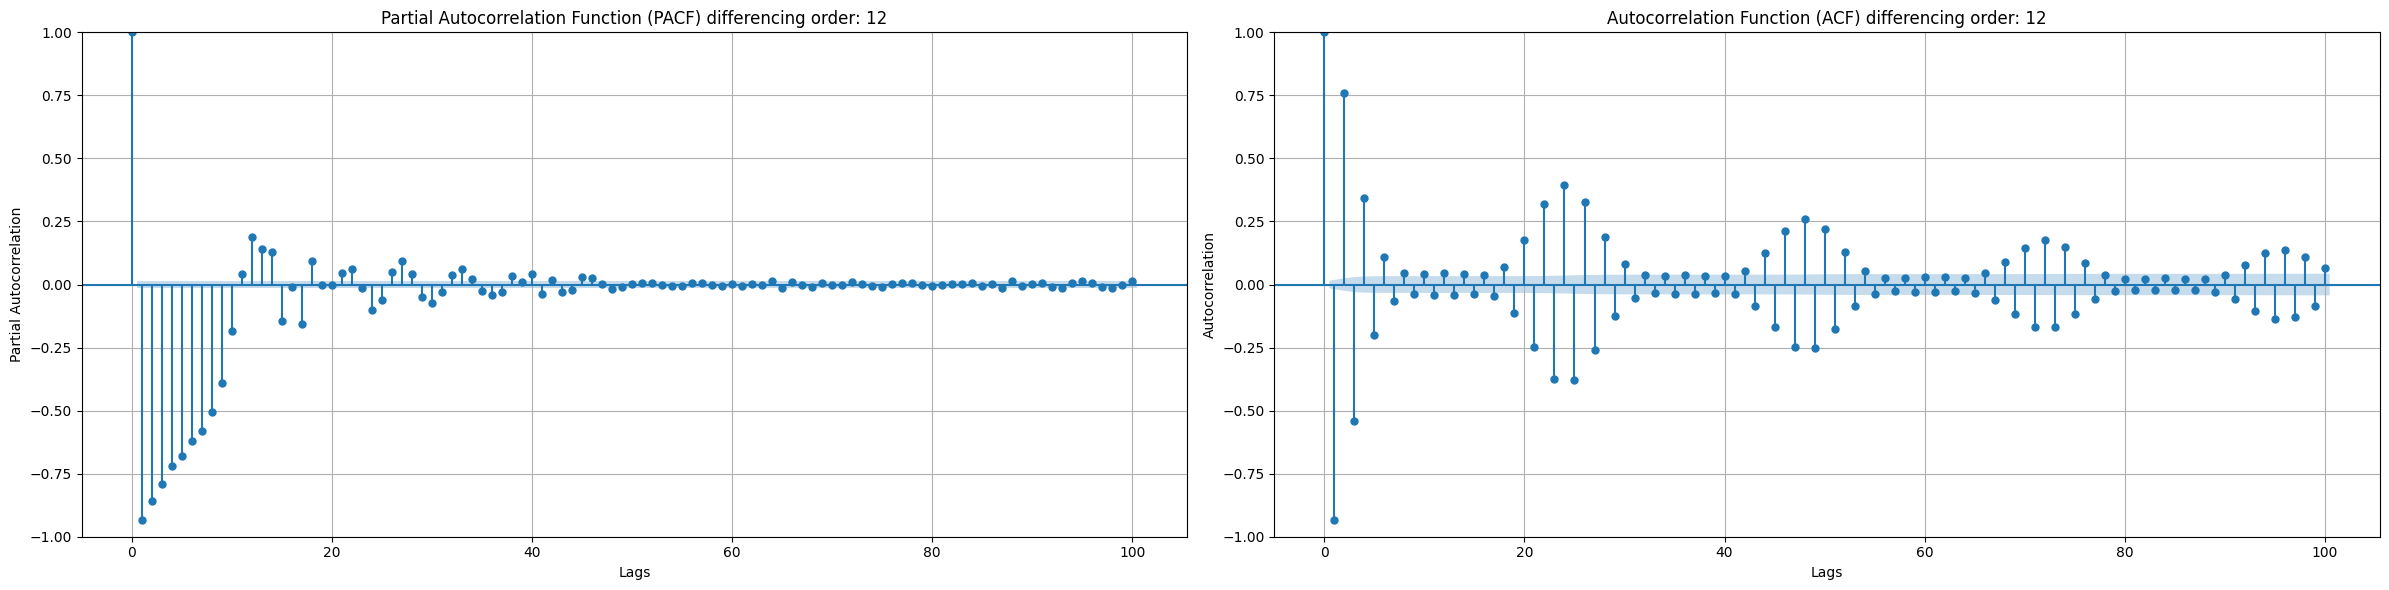

In [19]:
def differencing(series, order=1):
    for _ in range(order):
        series = series.diff().dropna()  # Применяем diff и убираем NaN значения
    return series



for i in range(1, 13):
    ts_diff = differencing(train['X'], i).dropna()


    # Plot PACF and ACF in one row
    fig, axes = plt.subplots(1, 2, figsize=(24, 6))


    # Plot PACF
    plot_pacf(ts_diff, lags=100, method='ywm', ax=axes[0])
    axes[0].set_title('Partial Autocorrelation Function (PACF) differencing order: ' + str(i))
    axes[0].set_xlabel('Lags')
    axes[0].set_ylabel('Partial Autocorrelation')
    axes[0].grid(True)

    # Plot ACF
    plot_acf(ts_diff, lags=100, ax=axes[1])
    axes[1].set_title('Autocorrelation Function (ACF) differencing order: ' + str(i))
    axes[1].set_xlabel('Lags')
    axes[1].set_ylabel('Autocorrelation')
    axes[1].grid(True)

    plt.tight_layout()
    plt.show()


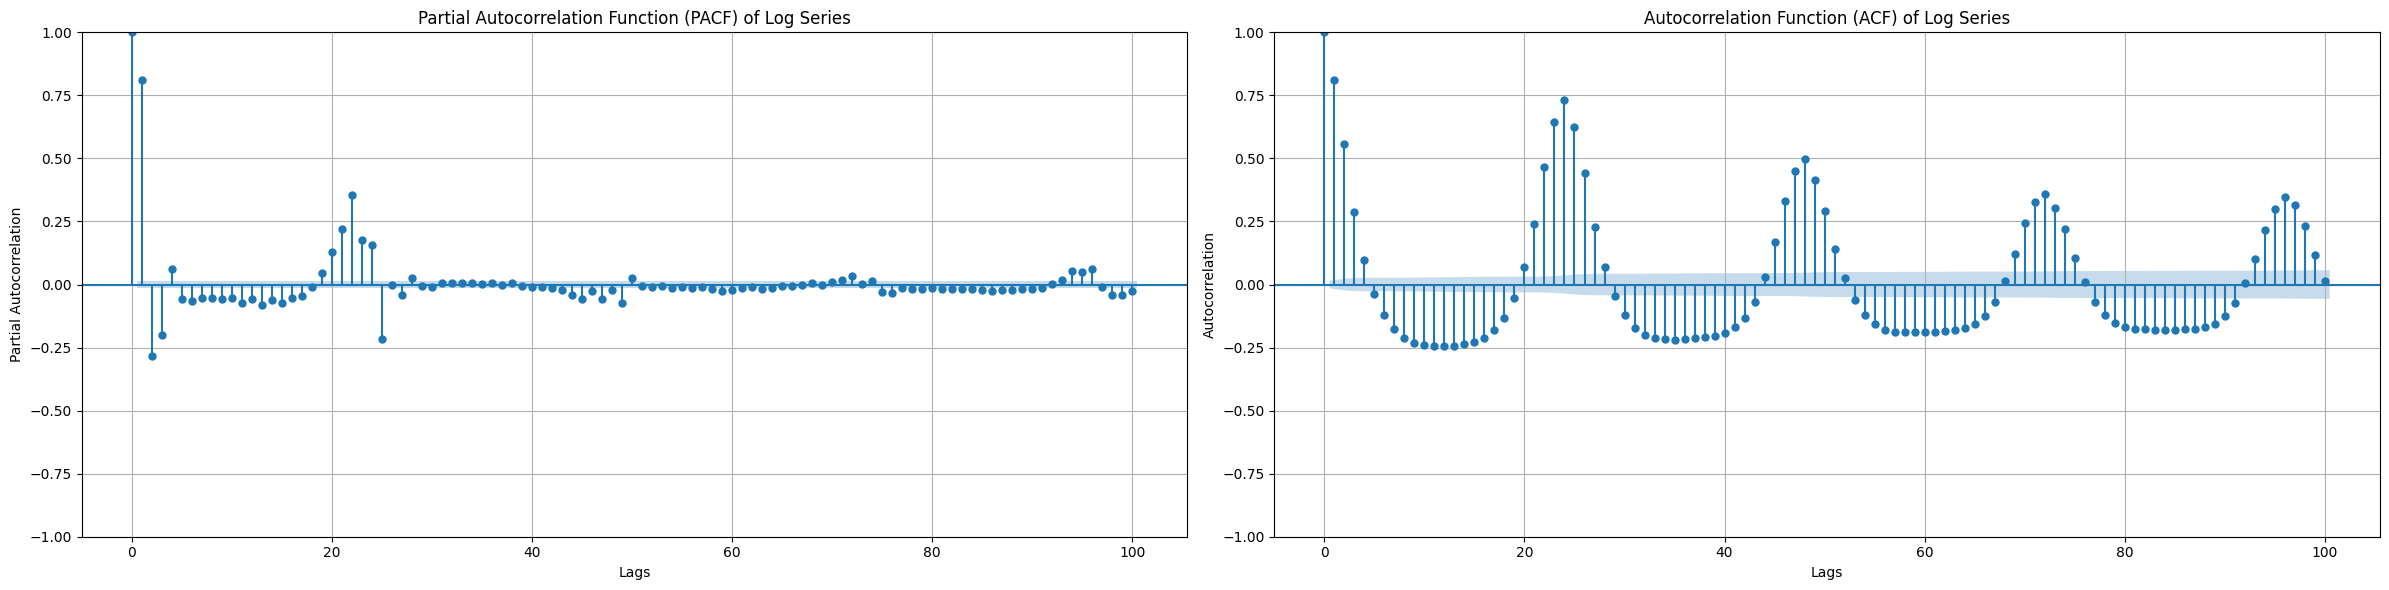

In [20]:
log_series = np.log(train['X'] + 1)
# Plot PACF and ACF in one row
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Plot PACF
plot_pacf(log_series, lags=100, method='ywm', ax=axes[0])
axes[0].set_title('Partial Autocorrelation Function (PACF) of Log Series')
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('Partial Autocorrelation')
axes[0].grid(True)

# Plot ACF
plot_acf(log_series, lags=100, ax=axes[1])
axes[1].set_title('Autocorrelation Function (ACF) of Log Series')
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('Autocorrelation')
axes[1].grid(True)

plt.tight_layout()
plt.show()

In [21]:
from arch.unitroot import VarianceRatio
frac_diff_order = VarianceRatio(train['X'], lags=2).stat  
print(f"Рекомендуемая степень дифференцирования: {frac_diff_order}")


Рекомендуемая степень дифференцирования: 6.905725201981896


# Какая то хуйня с данными, надо что то думать

In [22]:
from hurst import compute_Hc
H, c, data = compute_Hc(train['X'], kind='change', simplified=True)
print("Оценка показателя Хёрста:", H)

Оценка показателя Хёрста: 0.9061699955806338


# fractial differencing

In [23]:
from statsmodels.tsa.statespace.tools import diff
frac_diff_series = diff(train['X'], k_diff=0.4)


In [24]:
H, c, data = compute_Hc(frac_diff_series, kind='change', simplified=True)
print("Оценка показателя Хёрста:", H)

Оценка показателя Хёрста: 0.10233732797175901


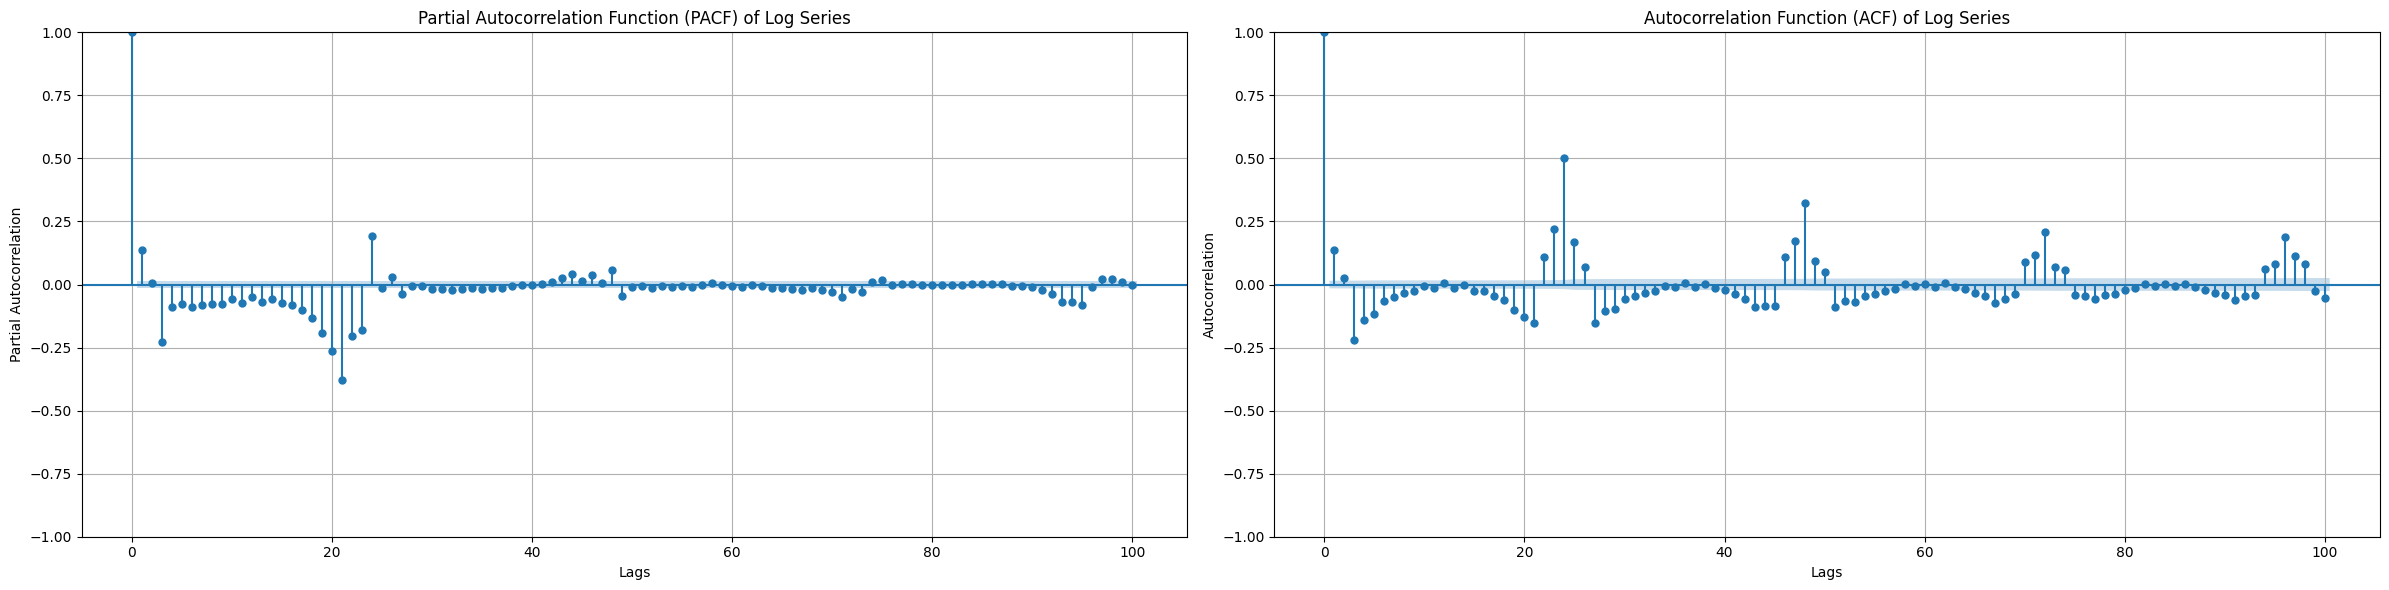

In [25]:

fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Plot PACF
plot_pacf(frac_diff_series, lags=100, method='ywm', ax=axes[0])
axes[0].set_title('Partial Autocorrelation Function (PACF) of Log Series')
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('Partial Autocorrelation')
axes[0].grid(True)

# Plot ACF
plot_acf(frac_diff_series, lags=100, ax=axes[1])
axes[1].set_title('Autocorrelation Function (ACF) of Log Series')
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('Autocorrelation')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## wavelet transform

In [26]:
import pywt

coeffs = pywt.wavedec(train['X'], 'db4', level=3)
filtered_series = pywt.waverec(coeffs[:-1], 'db4')

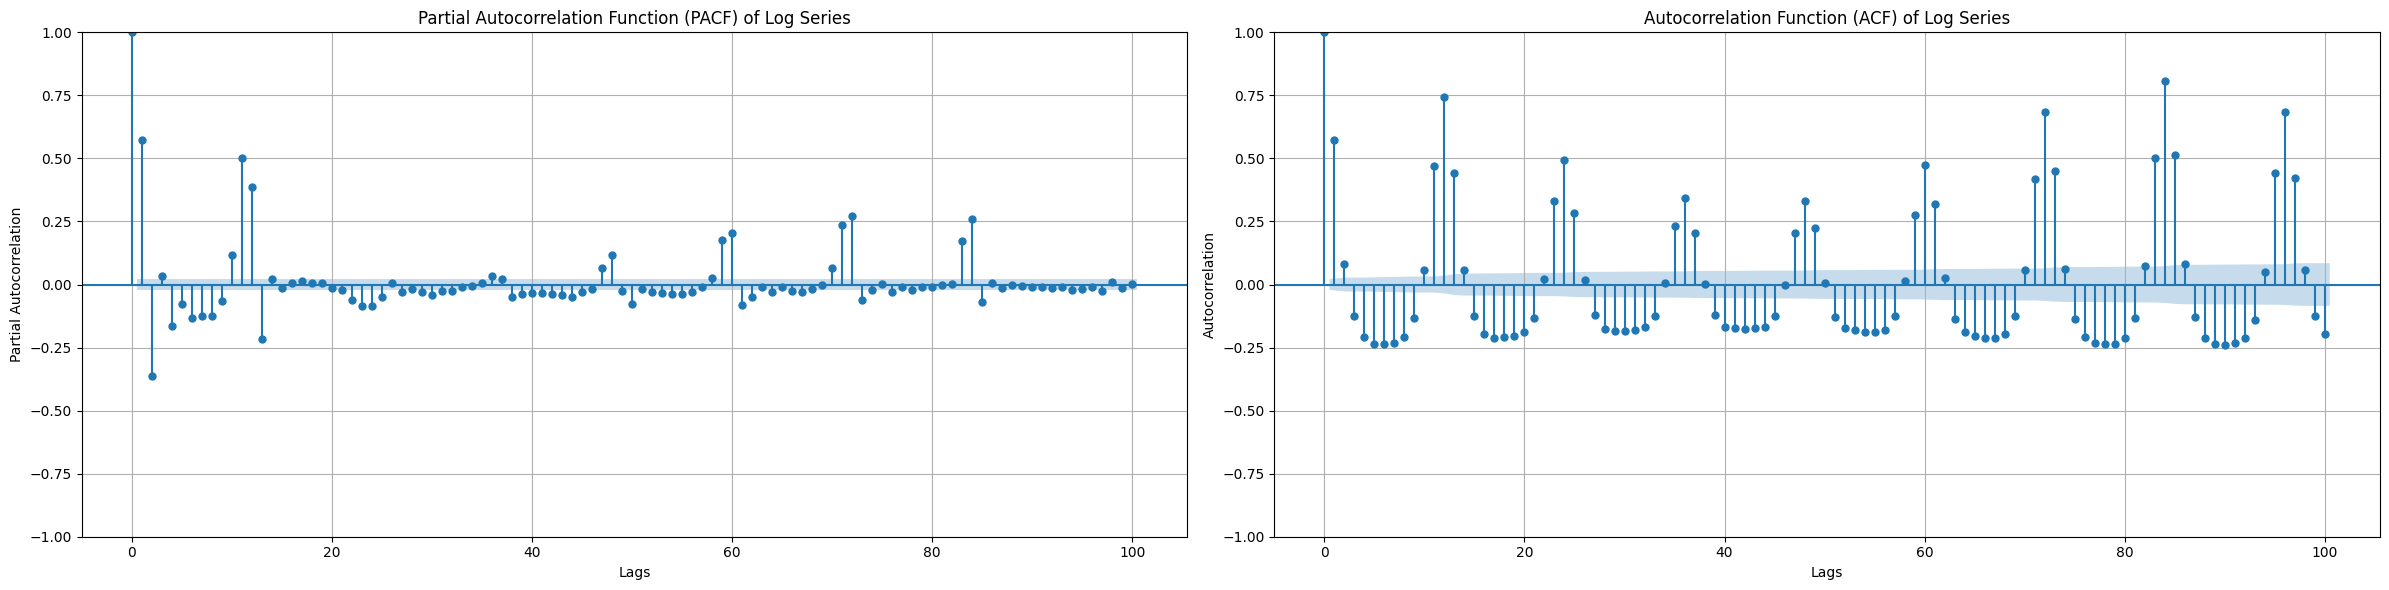

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Plot PACF
plot_pacf(filtered_series, lags=100, method='ywm', ax=axes[0])
axes[0].set_title('Partial Autocorrelation Function (PACF) of Log Series')
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('Partial Autocorrelation')
axes[0].grid(True)

# Plot ACF
plot_acf(filtered_series, lags=100, ax=axes[1])
axes[1].set_title('Autocorrelation Function (ACF) of Log Series')
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('Autocorrelation')
axes[1].grid(True)

plt.tight_layout()
plt.show()

## Structual shift

In [28]:
from statsmodels.tsa.stattools import zivot_andrews

za_result = zivot_andrews(train['X'].dropna())
print(f"Zivot-Andrews p-value: {za_result[1]:.4f}, break point: {za_result[-1]}")


Zivot-Andrews p-value: 0.0000, break point: 7736


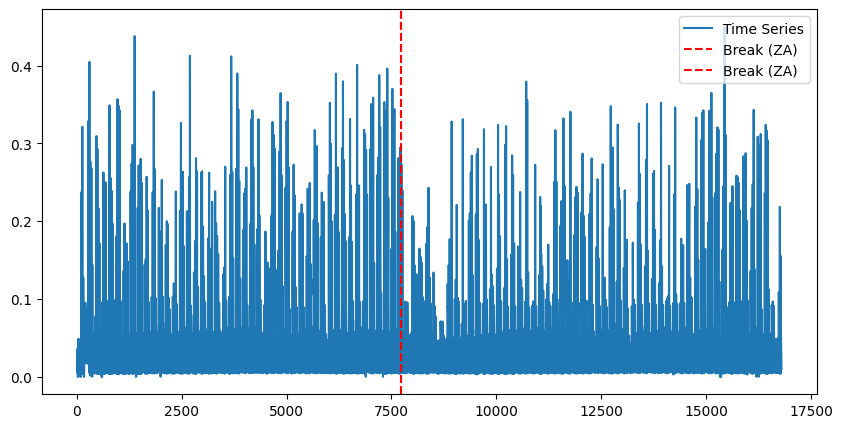

In [29]:
# Визуализация разрыва
plt.figure(figsize=(10, 5))
plt.plot(train['X'].tolist(), label="Time Series")
plt.axvline(za_result[-1], color="red", linestyle="--", label="Break (ZA)")
plt.axvline(za_result[-1], color="red", linestyle="--", label="Break (ZA)")

plt.legend()
plt.show()

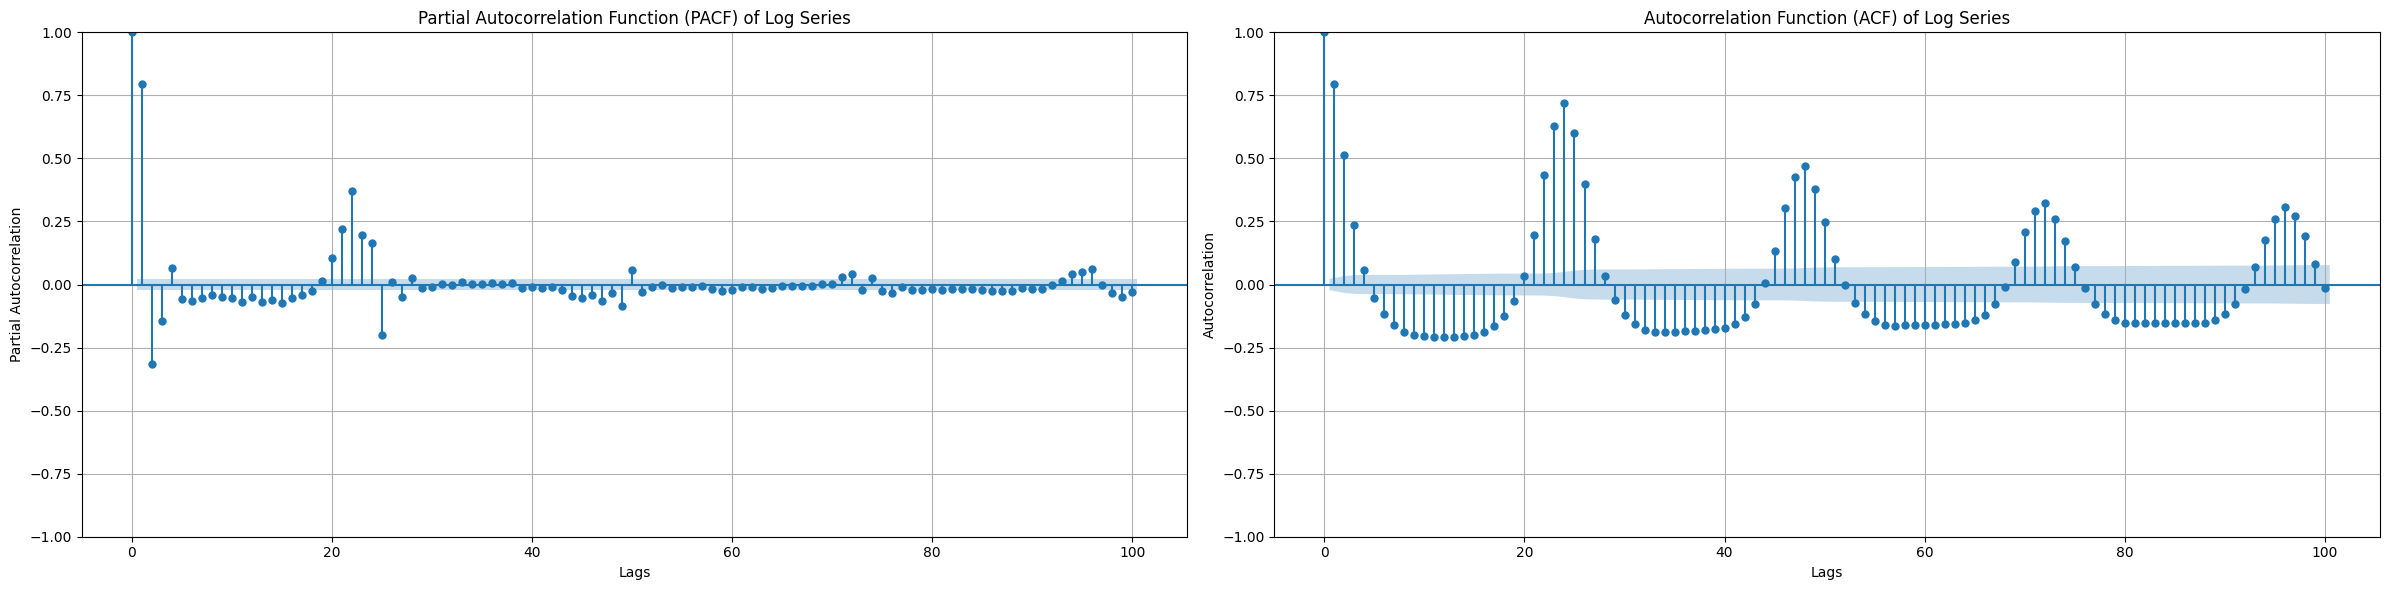

In [30]:



fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Plot PACF
plot_pacf(train['X'].tolist()[:za_result[-1]], lags=100, method='ywm', ax=axes[0])
axes[0].set_title('Partial Autocorrelation Function (PACF) of Log Series')
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('Partial Autocorrelation')
axes[0].grid(True)

# Plot ACF
plot_acf(train['X'].tolist()[:za_result[-1]], lags=100, ax=axes[1])
axes[1].set_title('Autocorrelation Function (ACF) of Log Series')
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('Autocorrelation')
axes[1].grid(True)

plt.tight_layout()
plt.show()


# Спектральный анализ

In [31]:
fft_result = np.fft.fft(train['X'])

frequencies = np.fft.fftfreq(len(train['X']))

fft_freqs = np.fft.fftfreq(len(train), d=1) 
fft_freqs = fft_freqs[:len(train)//2]  
fft_magnitudes = np.abs(fft_result)[:len(train)//2] 

threshold = np.max(fft_magnitudes) * 0.05  # Threshold for determining significant peaks


import plotly.graph_objects as go

# Visualize the spectrum
fig = go.Figure()
fig.add_trace(go.Scatter(x=fft_freqs, y=fft_magnitudes, mode='lines', name='Magnitude'))
fig.add_trace(go.Scatter(x=fft_freqs, y=[threshold]*len(fft_freqs), mode='lines', name='Threshold', line=dict(color='red', dash='dash')))
fig
fig.update_layout(
    title='Fourier Spectrum',
    xaxis_title='Frequency',
    yaxis_title='Amplitude'
)
fig.show()

# Extract peaks of the spectrum that may indicate seasonality
# Find indices of maximum amplitudes
peaks_indices = np.where(fft_magnitudes > threshold)[0]

# Print the found frequencies and their corresponding periods
for peak in peaks_indices:
    frequency = fft_freqs[peak]
    period = 1 / frequency  # Period (seasonality) = 1 / frequency
    print(f"Frequency: {frequency:.4f}, Period: {period:.2f} hours")

Frequency: 0.0000, Period: inf hours
Frequency: 0.0060, Period: 168.00 hours
Frequency: 0.0298, Period: 33.60 hours
Frequency: 0.0357, Period: 28.00 hours
Frequency: 0.0417, Period: 24.00 hours
Frequency: 0.0476, Period: 21.00 hours
Frequency: 0.0774, Period: 12.92 hours
Frequency: 0.0833, Period: 12.00 hours
Frequency: 0.0893, Period: 11.20 hours
Frequency: 0.1190, Period: 8.40 hours
Frequency: 0.1250, Period: 8.00 hours
Frequency: 0.1310, Period: 7.64 hours
Frequency: 0.1667, Period: 6.00 hours
Frequency: 0.1726, Period: 5.79 hours


In [32]:
169, 21, 11, 8

(169, 21, 11, 8)

# Seasonal decomposition


In [33]:
from statsmodels.tsa.seasonal import STL
data = pd.Series(train['X'].tolist(), index=hourly_index[:len(train)])

stl = STL(data, seasonal=169)


In [34]:
def decompose_multiple_seasons(data, seasonal_periods):
    """
    Функция для разложения временного ряда на несколько сезонных компонент
    и трендов, используя STL для каждого периода сезонности.

    :param data: Входной временной ряд (pandas.Series)
    :param seasonal_periods: Список сезонностей (например, [24, 168, 8760])
    :return: Комбинированная сезонность, тренд и остатки
    """
    residual_data = data.copy()
    seasonal_components = []

    for period in seasonal_periods:
        # Применение STL для текущей сезонности
        stl = STL(residual_data, seasonal=period, robust=True)
        result = stl.fit()
        
        seasonal_components.append(result.seasonal)
        
        residual_data = result.resid

    # Комбинируем все сезонные компоненты
    combined_seasonality = np.sum(seasonal_components, axis=0)
    trend = result.trend

    # Остатки — разница между исходными данными и трендом + сезонностью
    residuals = data - (trend + combined_seasonality)

    return trend, combined_seasonality, residuals

In [35]:
trend, combined_seasonality, residuals = decompose_multiple_seasons(train['X'], [169, 21, 11, 9, 5, 7])


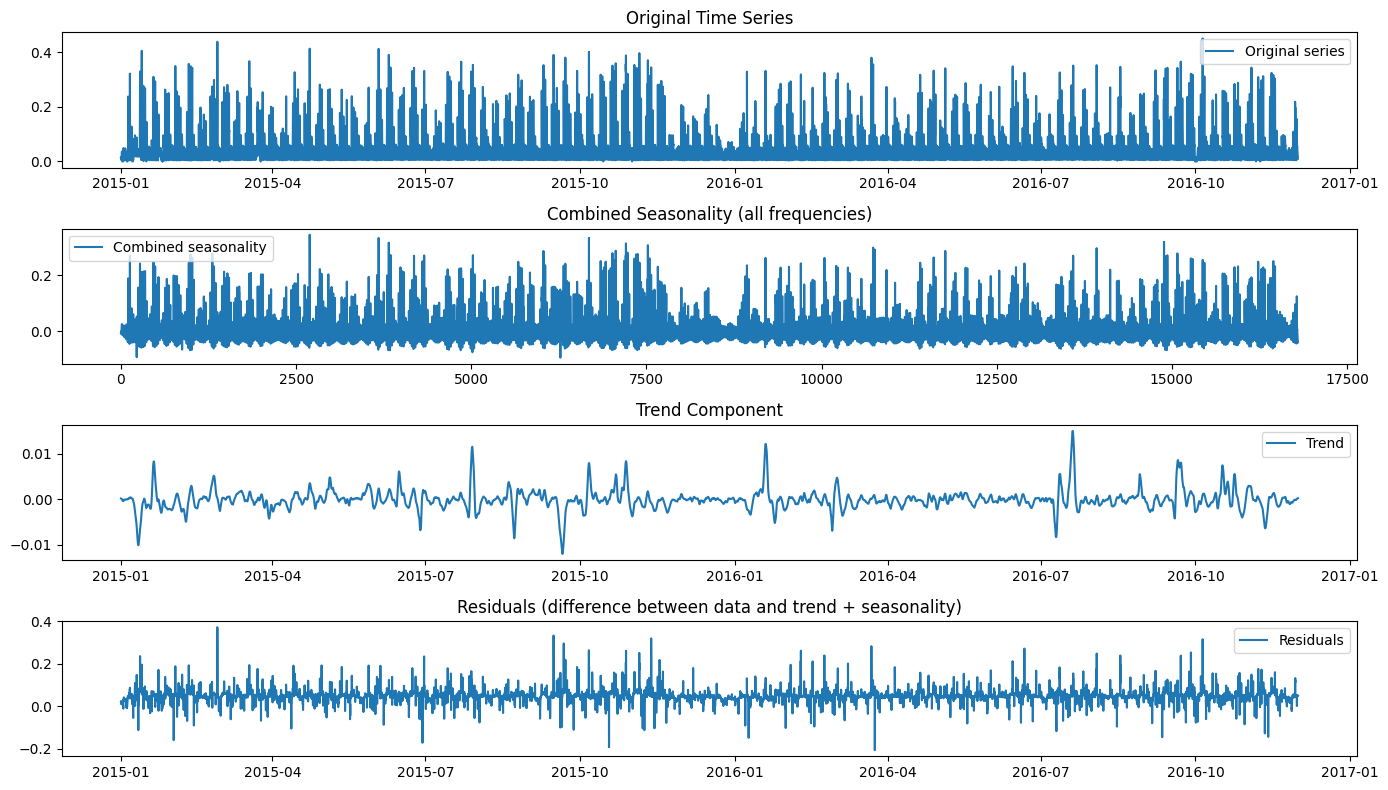

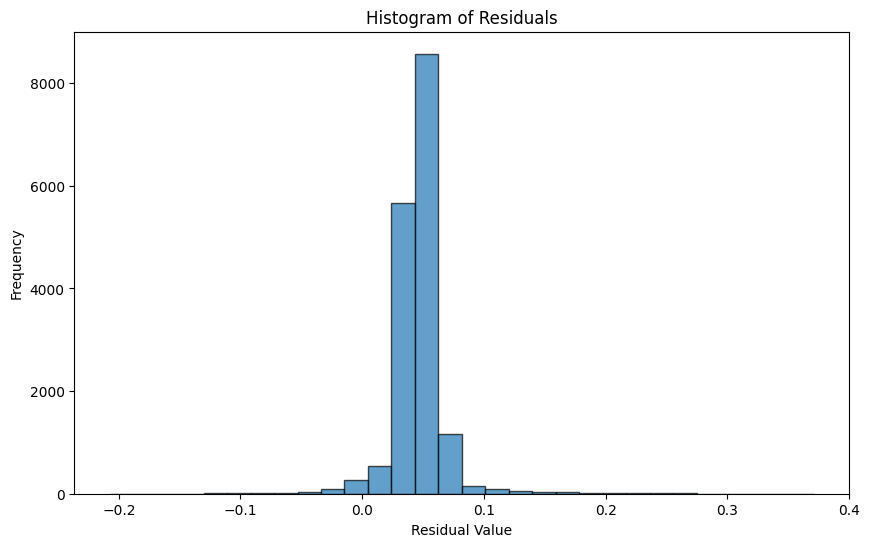

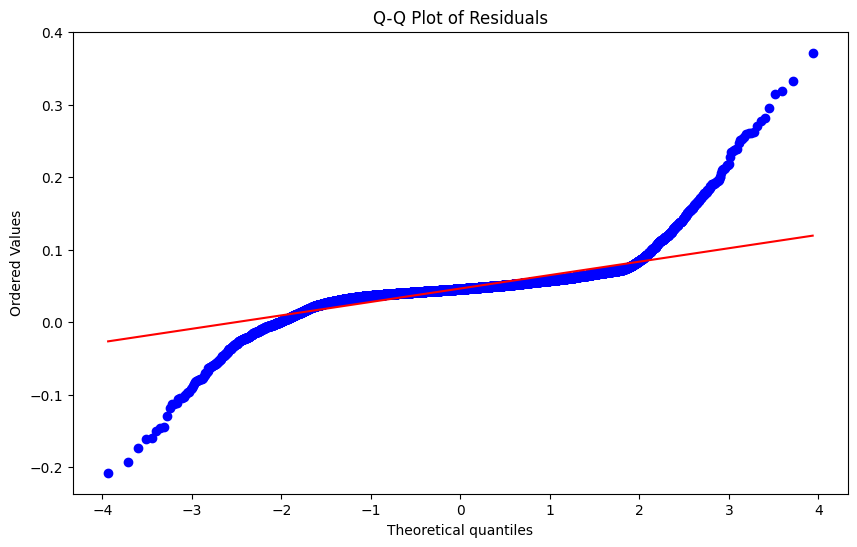

In [36]:
import scipy.stats as stats
# Visualize the result
plt.figure(figsize=(14, 8))

# Original time series
plt.subplot(4, 1, 1)
plt.plot(train['X'], label='Original series')
plt.title('Original Time Series')
plt.legend()

# Combined seasonality
plt.subplot(4, 1, 2)
plt.plot(combined_seasonality, label='Combined seasonality')
plt.title('Combined Seasonality (all frequencies)')
plt.legend()

# Trend
plt.subplot(4, 1, 3)
plt.plot(trend, label='Trend')
plt.title('Trend Component')
plt.legend()

# Residuals
plt.subplot(4, 1, 4)
plt.plot(residuals, label='Residuals')
plt.title('Residuals (difference between data and trend + seasonality)')
plt.legend()

plt.tight_layout()
plt.show()

# Check normality of residuals

# 1. Histogram of residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Residuals')
plt.xlabel('Residual Value')
plt.ylabel('Frequency')
plt.show()

# 2. Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


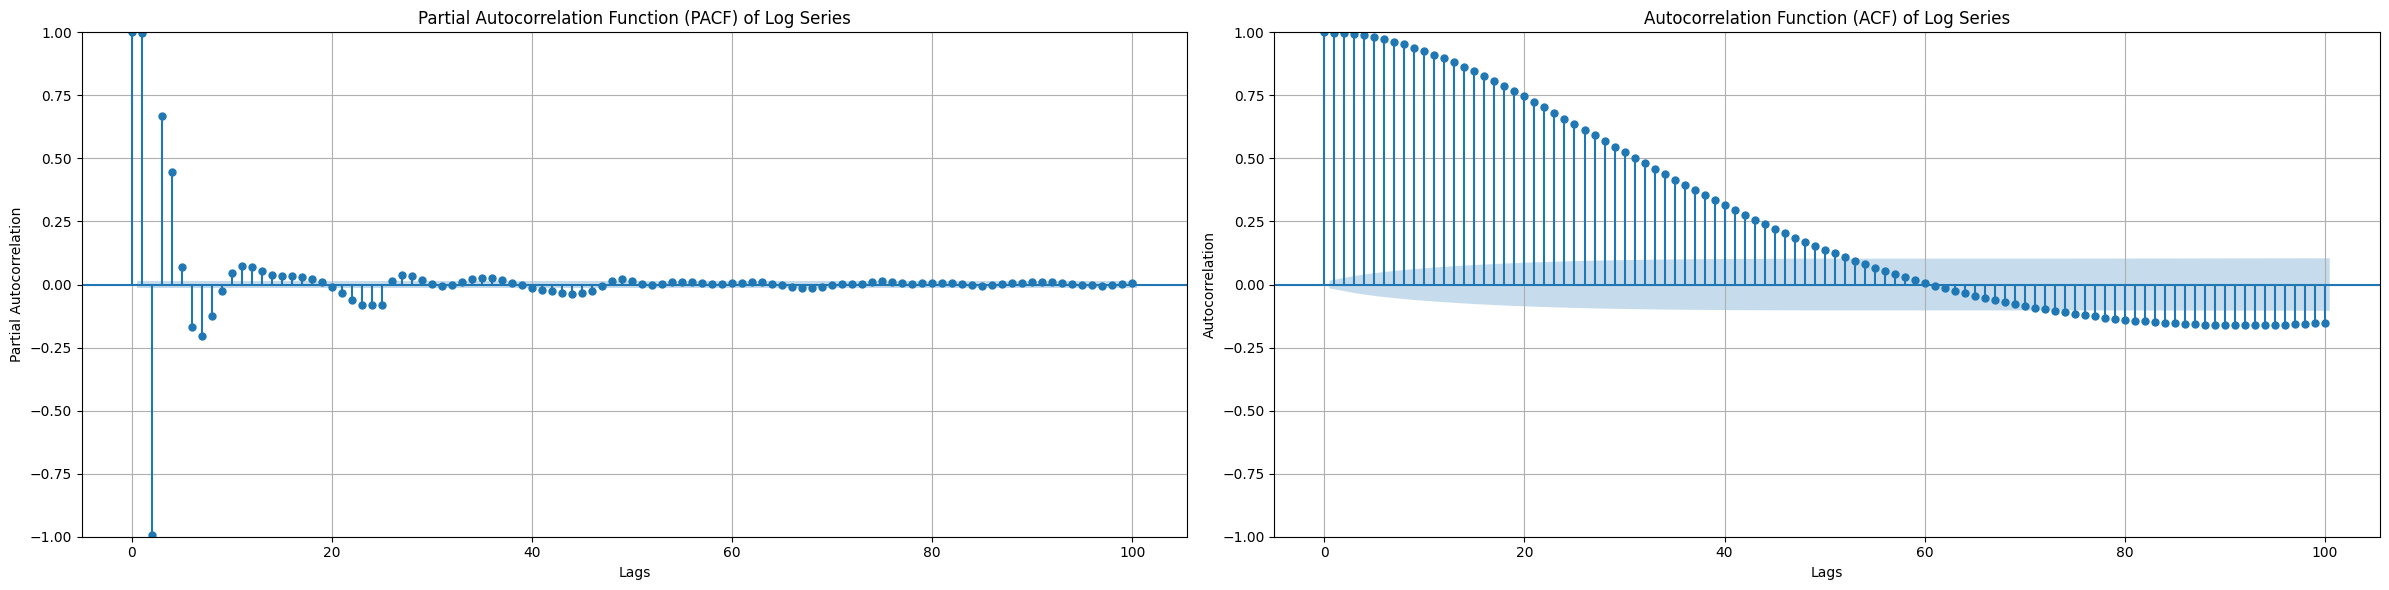

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(24, 6))

# Plot PACF
plot_pacf(trend, lags=100, method='ywm', ax=axes[0])
axes[0].set_title('Partial Autocorrelation Function (PACF) of Log Series')
axes[0].set_xlabel('Lags')
axes[0].set_ylabel('Partial Autocorrelation')
axes[0].grid(True)

# Plot ACF
plot_acf(trend, lags=100, ax=axes[1])
axes[1].set_title('Autocorrelation Function (ACF) of Log Series')
axes[1].set_xlabel('Lags')
axes[1].set_ylabel('Autocorrelation')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# lets try another decomposition


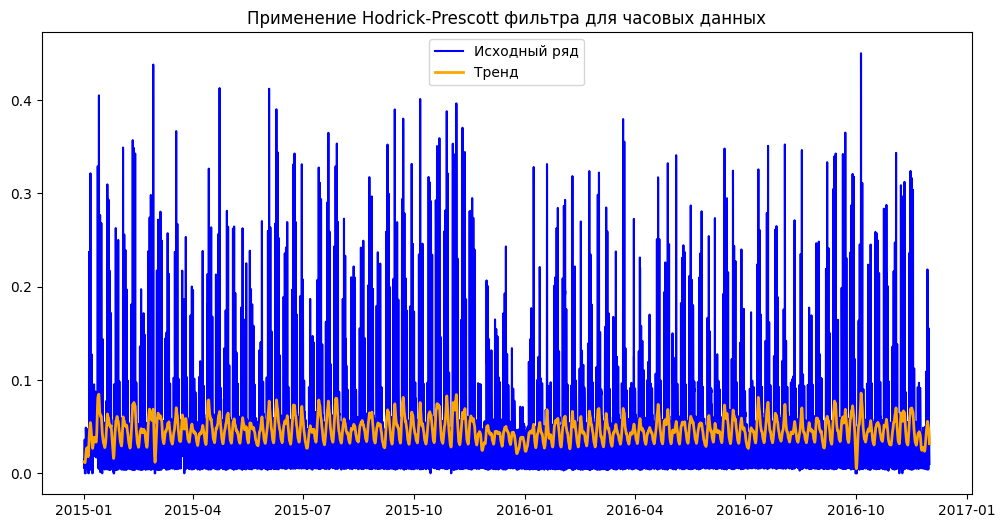

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.filters.hp_filter import hpfilter




cycle, trend = hpfilter(train['X'], lamb=10000)

# Визуализация
plt.figure(figsize=(12, 6))

plt.plot(train['X'], label='Исходный ряд', color='blue')
plt.plot(trend, label='Тренд', color='orange', linewidth=2)
plt.title('Применение Hodrick-Prescott фильтра для часовых данных')
plt.legend()
plt.show()


# Arima approach

In [55]:
from pmdarima import auto_arima


In [ ]:
model = auto_arima(train['X'], seasonal=True, m=24, stepwise=True, trace=True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[24] intercept   : AIC=-76790.308, Time=56.28 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=-53693.971, Time=1.39 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=-76257.762, Time=39.94 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=-70489.371, Time=34.69 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=-42951.249, Time=0.30 sec
 ARIMA(2,0,2)(0,0,1)[24] intercept   : AIC=-75274.983, Time=52.46 sec
 ARIMA(2,0,2)(1,0,0)[24] intercept   : AIC=-76615.886, Time=52.27 sec
 ARIMA(2,0,2)(2,0,1)[24] intercept   : AIC=-77211.149, Time=502.78 sec


KeyboardInterrupt: 

In [ ]:
169, 21, 11, 9

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

train2 = train[-3000:-1000]
test = train[-1000:]




In [43]:
model_weekly = SARIMAX(train2['X'],
                      order=(1, 1, 1),         
                      seasonal_order=(1, 1, 1, 21), 
                      enforce_stationarity=True, stepwise=True)
result_weekly = model_weekly.fit()

d:\Anaconda\envs\yandex-market\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



In [44]:
model_daily = SARIMAX(train2['X'],
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, 24),  
                       enforce_stationarity=True,
                       enforce_invertibility=False, stepwise=True)


result_daily = model_daily.fit()

In [ ]:
# model_monthly = SARIMAX(train2['X'],
#                         order=(1, 1, 1),
#                         seasonal_order=(1, 1, 1, 720),  # Месячная сезонность
#                         enforce_stationarity=True,
#                         enforce_invertibility=False, stepwise=True)


# result_monthly = model_monthly.fit()

In [59]:
model_halfdaily = SARIMAX(train2['X'],
                        order=(1, 1, 1),
                        seasonal_order=(1, 1, 1, 11),  # Месячная сезонность
                        enforce_stationarity=True,
                        enforce_invertibility=False, stepwise=True)


result_halfdaily = model_halfdaily.fit()


MSE for model_weekly: 0.002370039622809884
MSE for model_daily: 0.0014814977892905654
MSE for model_halfdaily: 0.00663811213043862


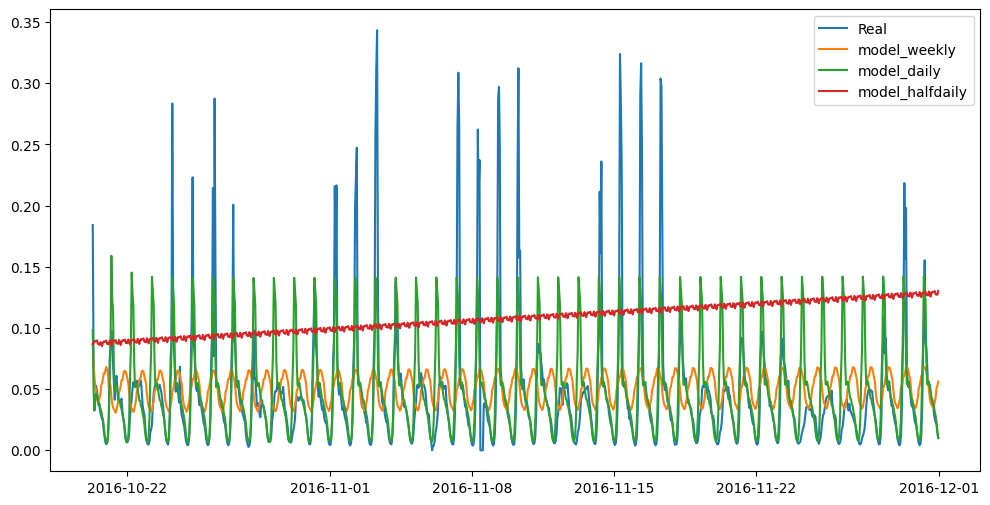

In [66]:
test_forecast = pd.DataFrame(index=test.index)


test_forecast['model_weekly'] = result_weekly.predict(start=test.index[0], end=test.index[-1], dynamic=False)
test_forecast['model_daily'] = result_daily.predict(start=test.index[0], end=test.index[-1], dynamic=False)
test_forecast['model_halfdaily'] = result_halfdaily.predict(start=test.index[0], end=test.index[-1], dynamic=False)
test_forecast['real'] = test['X']

predictions_names = ['model_weekly', 'model_daily', 'model_halfdaily']

mse_scores = {}
for prediction_name in predictions_names:
    test_forecast[prediction_name] = test_forecast[prediction_name].astype(float)
    mse_scores[prediction_name] = mean_squared_error(test_forecast['real'], test_forecast[prediction_name])


# Вывод всех MSE
for model, mse in mse_scores.items():
    print(f'MSE for {model}: {mse}')

# Построение графика с прогнозом и реальным значением
plt.figure(figsize=(12, 6))
plt.plot(test_forecast.index, test_forecast['real'], label='Real')
for prediction_name in predictions_names:
    plt.plot(test_forecast.index, test_forecast[prediction_name], label=prediction_name)
plt.legend()
plt.show()



# nONLINEAR PREDICTION